# Potential Outcomes Framework: Marketing Example

## Model
- $X \sim \text{Uniform}(-2, 2)$ represents customer attributes (e.g., age, income).  
- $Y(0) = 2 \sin(X) + X^2 + \epsilon_0$, $Y(1) = 3 \cos(X) + X^2 + \epsilon_1$, where $\epsilon_0, \epsilon_1 \sim \mathcal{N}(0, 0.5)$ represent random noise in customer behavior.  
- $T \sim \text{Bernoulli}(0.5)$ indicates whether a customer sees an ad ($T=1$) or not ($T=0$).  
- $Y = T \cdot Y(1) + (1-T) \cdot Y(0)$ is the observed sales outcome.

## Estimands and Derivations
1. **ITE**:  
   $ITE_i = Y_i(1) - Y_i(0) = 3 \cos(X_i) - 2 \sin(X_i) + (\epsilon_{1i} - \epsilon_{0i})$  
   Measures the effect of the ad on individual customer $i$.  

2. **ATE**:  
   $\tau = \mathbb{E}[Y(1) - Y(0)] = \frac{3}{4} \big(\sin(2) - \sin(-2)\big) \approx 1.364$  
   Measures the average sales lift across all customers.  

3. **ATT**:  
   $ATT = \mathbb{E}[Y(1) - Y(0) \mid T = 1] = \tau = 1.364$  
   Measures the average sales lift among customers exposed to the ad.

4. **CATE**:  
   $\tau(x) = \mathbb{E}[Y(1) - Y(0) \mid X = x] = 3 \cos(x) - 2 \sin(x)$  
   - $\tau(-2) \approx 0.570$, $\tau(0) = 3.000$, $\tau(2) \approx -3.067$  
   Shows how the ad's effect varies with customer attributes (e.g., younger vs. older customers).

## Summary
- **ITE** measures individual-level ad effectiveness.  
- **CATE** reveals how ad effectiveness depends on customer characteristics.  
- **ATE** estimates overall ad effectiveness.  
- **ATT** focuses on the effectiveness for those who saw the ad.

/var/folders/b7/1tvk5qmx0ds9c6gk2lrlhv380000gn/T/ipykernel_31416/4057004703.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cate_means = data.groupby(cate_bins)['ITE'].mean()


True ATE: 1.399
Estimated ATE: 1.412
ATT: 1.381


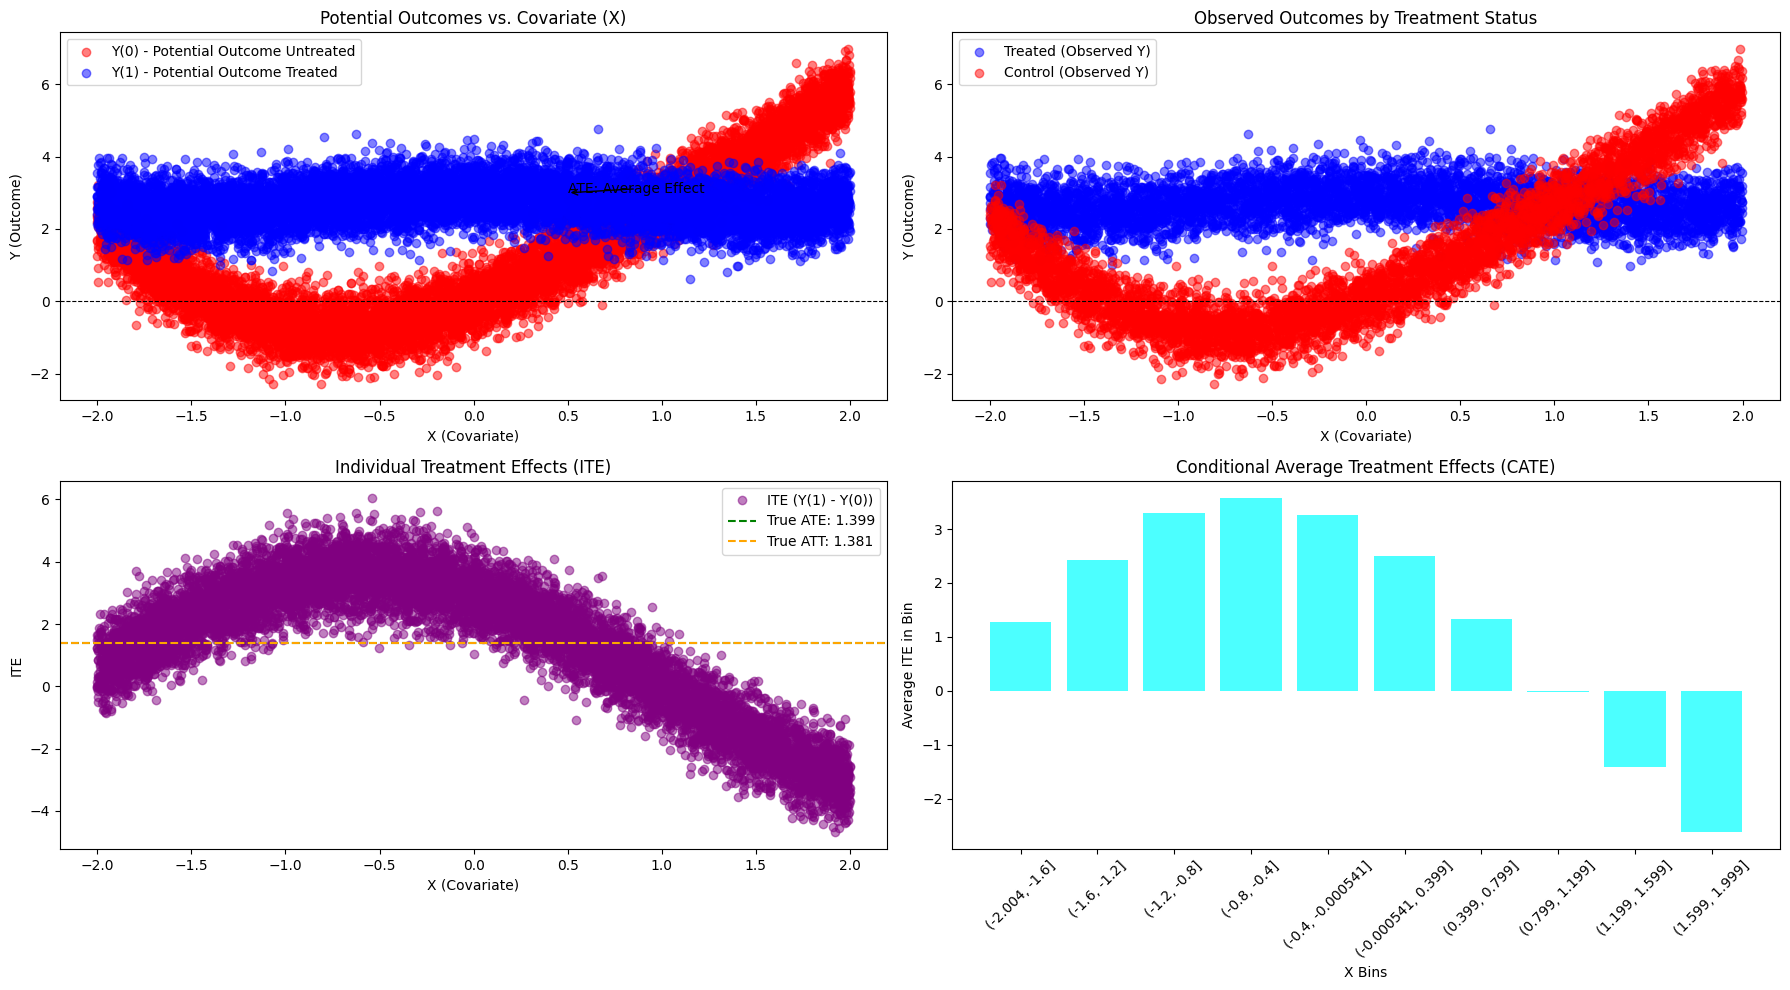

,Estimand,Theoretical Value,Simulated Value
0,ATE,1.364000,1.398541
1,ATT,1.364000,1.380533
2,CATE(X=-2),0.570154,0.748866
3,CATE(X=0),3.000000,2.938533
4,CATE(X=2),-3.067035,-3.013799


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Generate Covariates (X)
n = 10000  # Number of observations
X = np.random.uniform(-2, 2, n)  # Covariate distribution (uniform for nonlinearity)

# Step 2: Define Nonlinear True Potential Outcomes
epsilon_0 = np.random.normal(0, 0.5, n)  # Noise for Y(0)
epsilon_1 = np.random.normal(0, 0.5, n)  # Noise for Y(1)
Y_0 = 2 * np.sin(X) + X**2 + epsilon_0  # Y(0): Nonlinear function of X
Y_1 = 3 * np.cos(X) + X**2 + epsilon_1  # Y(1): Different nonlinear function of X

# Step 3: Assign Treatment (T)
T = np.random.binomial(1, 0.5, n)  # Random assignment with P(T=1) = 0.5

# Step 4: Observe Realized Outcomes
Y = np.where(T == 1, Y_1, Y_0)  # Realized outcome depends on treatment

# Step 5: Store Data
data = pd.DataFrame({
    'X': X,
    'T': T,
    'Y_0': Y_0,  # Potential outcome if untreated
    'Y_1': Y_1,  # Potential outcome if treated
    'Y': Y       # Observed outcome
})

# Step 6: Compute and Compare Effects
data['ITE'] = data['Y_1'] - data['Y_0']  # True Individual Treatment Effect
estimated_ate = data.loc[data['T'] == 1, 'Y'].mean() - data.loc[data['T'] == 0, 'Y'].mean()  # Estimated ATE
true_ate = data['ITE'].mean()  # True ATE
att = data.loc[data['T'] == 1, 'ITE'].mean()  # ATT for treated group

# Step 7: Compute CATE for specific values of X
specific_x_values = [-2, 0, 2]
cate_values = [
    data.loc[np.abs(data['X'] - x) < 0.1, 'ITE'].mean()
    for x in specific_x_values
]

# Visualization
plt.figure(figsize=(18, 10))

# Scatterplot of potential outcomes
plt.subplot(2, 2, 1)
plt.scatter(X, Y_0, alpha=0.5, label='Y(0) - Potential Outcome Untreated', color='red')
plt.scatter(X, Y_1, alpha=0.5, label='Y(1) - Potential Outcome Treated', color='blue')
plt.title('Potential Outcomes vs. Covariate (X)')
plt.xlabel('X (Covariate)')
plt.ylabel('Y (Outcome)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.annotate('ATE: Average Effect', xy=(0.5, 3), fontsize=10, color='black', arrowprops=dict(arrowstyle='->', color='black'))

# Observed outcomes and treatment effect
plt.subplot(2, 2, 2)
treated = data[data['T'] == 1]
control = data[data['T'] == 0]
plt.scatter(treated['X'], treated['Y'], color='blue', alpha=0.5, label='Treated (Observed Y)')
plt.scatter(control['X'], control['Y'], color='red', alpha=0.5, label='Control (Observed Y)')
plt.title('Observed Outcomes by Treatment Status')
plt.xlabel('X (Covariate)')
plt.ylabel('Y (Outcome)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()

# ITE visualization
plt.subplot(2, 2, 3)
plt.plot(X, data['ITE'], 'o', alpha=0.5, label='ITE (Y(1) - Y(0))', color='purple')
plt.axhline(true_ate, color='green', linestyle='--', label=f'True ATE: {true_ate:.3f}')
plt.axhline(att, color='orange', linestyle='--', label=f'True ATT: {att:.3f}')
plt.title('Individual Treatment Effects (ITE)')
plt.xlabel('X (Covariate)')
plt.ylabel('ITE')
plt.legend()

# CATE visualization
plt.subplot(2, 2, 4)
cate_bins = pd.cut(X, bins=10)
cate_means = data.groupby(cate_bins)['ITE'].mean()
plt.bar(cate_means.index.astype(str), cate_means, alpha=0.7, color='cyan')
plt.title('Conditional Average Treatment Effects (CATE)')
plt.xlabel('X Bins')
plt.ylabel('Average ITE in Bin')
plt.xticks(rotation=45)

# Show results
print(f"True ATE: {true_ate:.3f}")
print(f"Estimated ATE: {estimated_ate:.3f}")
print(f"ATT: {att:.3f}")

plt.tight_layout()
plt.show()

# Create comparison table
results = {
    "Estimand": ["ATE", "ATT"] + [f"CATE(X={x})" for x in specific_x_values],
    "Theoretical Value": [1.364, 1.364] + [3 * np.cos(x) - 2 * np.sin(x) for x in specific_x_values],  # Theoretical CATE
    "Simulated Value": [true_ate, att] + cate_values  # Simulated CATE
}
results_df = pd.DataFrame(results)

# Display the table
display(results_df)


# Sampling Distribution Analysis: Difference-in-Means Estimator

### Assumptions
1. $T \perp (Y(0), Y(1))$ (Unconfoundedness)  
2. $P(T = 1 \mid X) > 0$ (Overlap)  
3. Stable outcomes unaffected by other units (SUTVA)  

### Estimator
$$
\hat{\tau} = \frac{1}{n_1} \sum_{i=1}^n D_i Y_i - \frac{1}{n_0} \sum_{i=1}^n (1 - D_i) Y_i
$$

### Standard Error
$$
SE = \sqrt{\frac{\hat{\sigma}_1^2}{n_1} + \frac{\hat{\sigma}_0^2}{n_0}}
$$

### Confidence Interval
$$
[\hat{\tau} - 1.96 \cdot SE, \hat{\tau} + 1.96 \cdot SE]
$$

- **Estimator**: Difference in group means.  
- **Standard Error**: Combines variances of treated and control groups.  
- **Confidence Interval**: Captures the range of plausible values for $\hat{\tau}$.

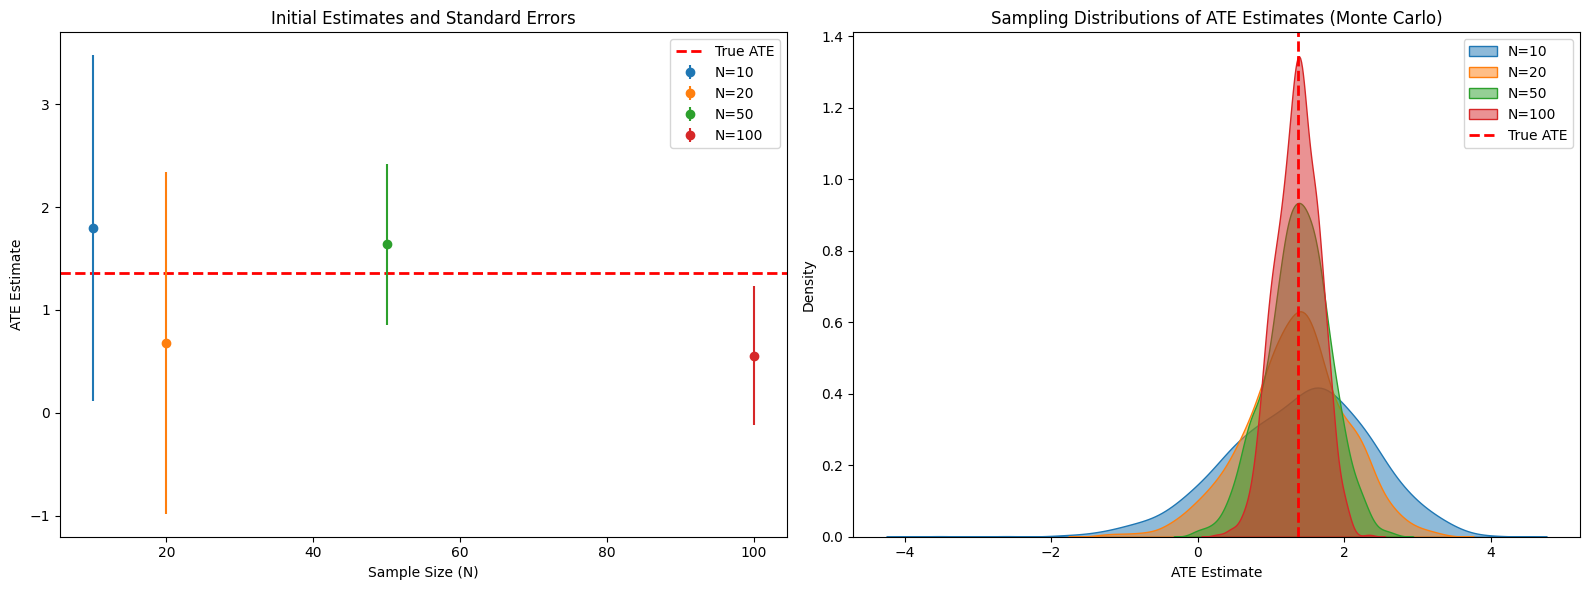

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Define the true model for generating data
def generate_data(N):
    X = np.random.uniform(-2, 2, N)
    epsilon_0 = np.random.normal(0, 0.5, N)
    epsilon_1 = np.random.normal(0, 0.5, N)
    Y_0 = 2 * np.sin(X) + X**2 + epsilon_0
    Y_1 = 3 * np.cos(X) + X**2 + epsilon_1
    T = np.random.binomial(1, 0.5, N)
    Y = np.where(T == 1, Y_1, Y_0)
    return pd.DataFrame({'X': X, 'T': T, 'Y_0': Y_0, 'Y_1': Y_1, 'Y': Y})

# Define the function to compute ATE via difference in means
def compute_diff_in_means(data):
    treated = data[data['T'] == 1]['Y']
    control = data[data['T'] == 0]['Y']
    return treated.mean() - control.mean()

# Compute standard error for ATE
def compute_standard_error(data):
    treated = data[data['T'] == 1]['Y']
    control = data[data['T'] == 0]['Y']
    n_treated = len(treated)
    n_control = len(control)
    var_treated = treated.var(ddof=1)
    var_control = control.var(ddof=1)
    return np.sqrt(var_treated / n_treated + var_control / n_control)

# Initial run: Compute mean and standard error for each sample size
sample_sizes = [10, 20, 50, 100]
true_ate = 1.364  # Theoretical ATE value
initial_estimates = {}

for N in sample_sizes:
    data = generate_data(N)
    mean_estimate = compute_diff_in_means(data)
    stderr = compute_standard_error(data)
    initial_estimates[N] = (mean_estimate, stderr)

# Monte Carlo Simulation
M = 1000  # Number of Monte Carlo iterations
sampling_distributions = {}

for N in sample_sizes:
    estimates = []
    for _ in range(M):
        data = generate_data(N)
        ate_estimate = compute_diff_in_means(data)
        estimates.append(ate_estimate)
    sampling_distributions[N] = estimates

# Create 1x2 grid of plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First plot: Initial estimates and standard errors
axes[0].axhline(true_ate, color='red', linestyle='--', label='True ATE', linewidth=2)
for N, (mean_estimate, stderr) in initial_estimates.items():
    axes[0].errorbar(N, mean_estimate, yerr=1.96 * stderr, fmt='o', label=f'N={N}')
axes[0].set_title('Initial Estimates and Standard Errors')
axes[0].set_xlabel('Sample Size (N)')
axes[0].set_ylabel('ATE Estimate')
axes[0].legend()

# Second plot: Sampling distributions of ATE estimates
for N, estimates in sampling_distributions.items():
    sns.kdeplot(estimates, label=f'N={N}', fill=True, alpha=0.5, ax=axes[1])
axes[1].axvline(true_ate, color='red', linestyle='--', label='True ATE', linewidth=2)
axes[1].set_title('Sampling Distributions of ATE Estimates (Monte Carlo)')
axes[1].set_xlabel('ATE Estimate')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()


# Monte Carlo Simulation: ATE Estimators

## Models
1. **No Covariates**:  
   $Y = b_0 + b_1 T + e$

2. **With Covariates**:  
   $Y = b_0 + b_1 T + b_2 X + e$

3. **With Interaction**:  
   $Y = b_0 + b_1 T + b_2 X + b_3 T(X - \bar{X}) + e$

4. **With $X^2$ and Interaction**:  
   $Y = b_0 + b_1 T + b_2 X + b_3 T X + b_4 X^2 + b_5 T X^2 + e$  

   $\text{ATE} = b_1 + b_3 \mathbb{E}[X] + b_5 \mathbb{E}[X^2]$

5. **With $X^3$ and Interaction**:  
   $Y = b_0 + b_1 T + b_2 X + b_3 T X + b_4 X^2 + b_5 T X^2 + b_6 X^3 + b_7 T X^3 + e$  

   $\text{ATE} = b_1 + b_3 \mathbb{E}[X] + b_5 \mathbb{E}[X^2] + b_7 \mathbb{E}[X^3]$

## Results
- **Methods Evaluated**: 5 regression-based estimators.
- **Sample Sizes**: $N \in \{10, 50, 100, 500\}$.
- **Visualization**: KDE plots of sampling distributions across sample sizes, showing convergence to the true ATE.

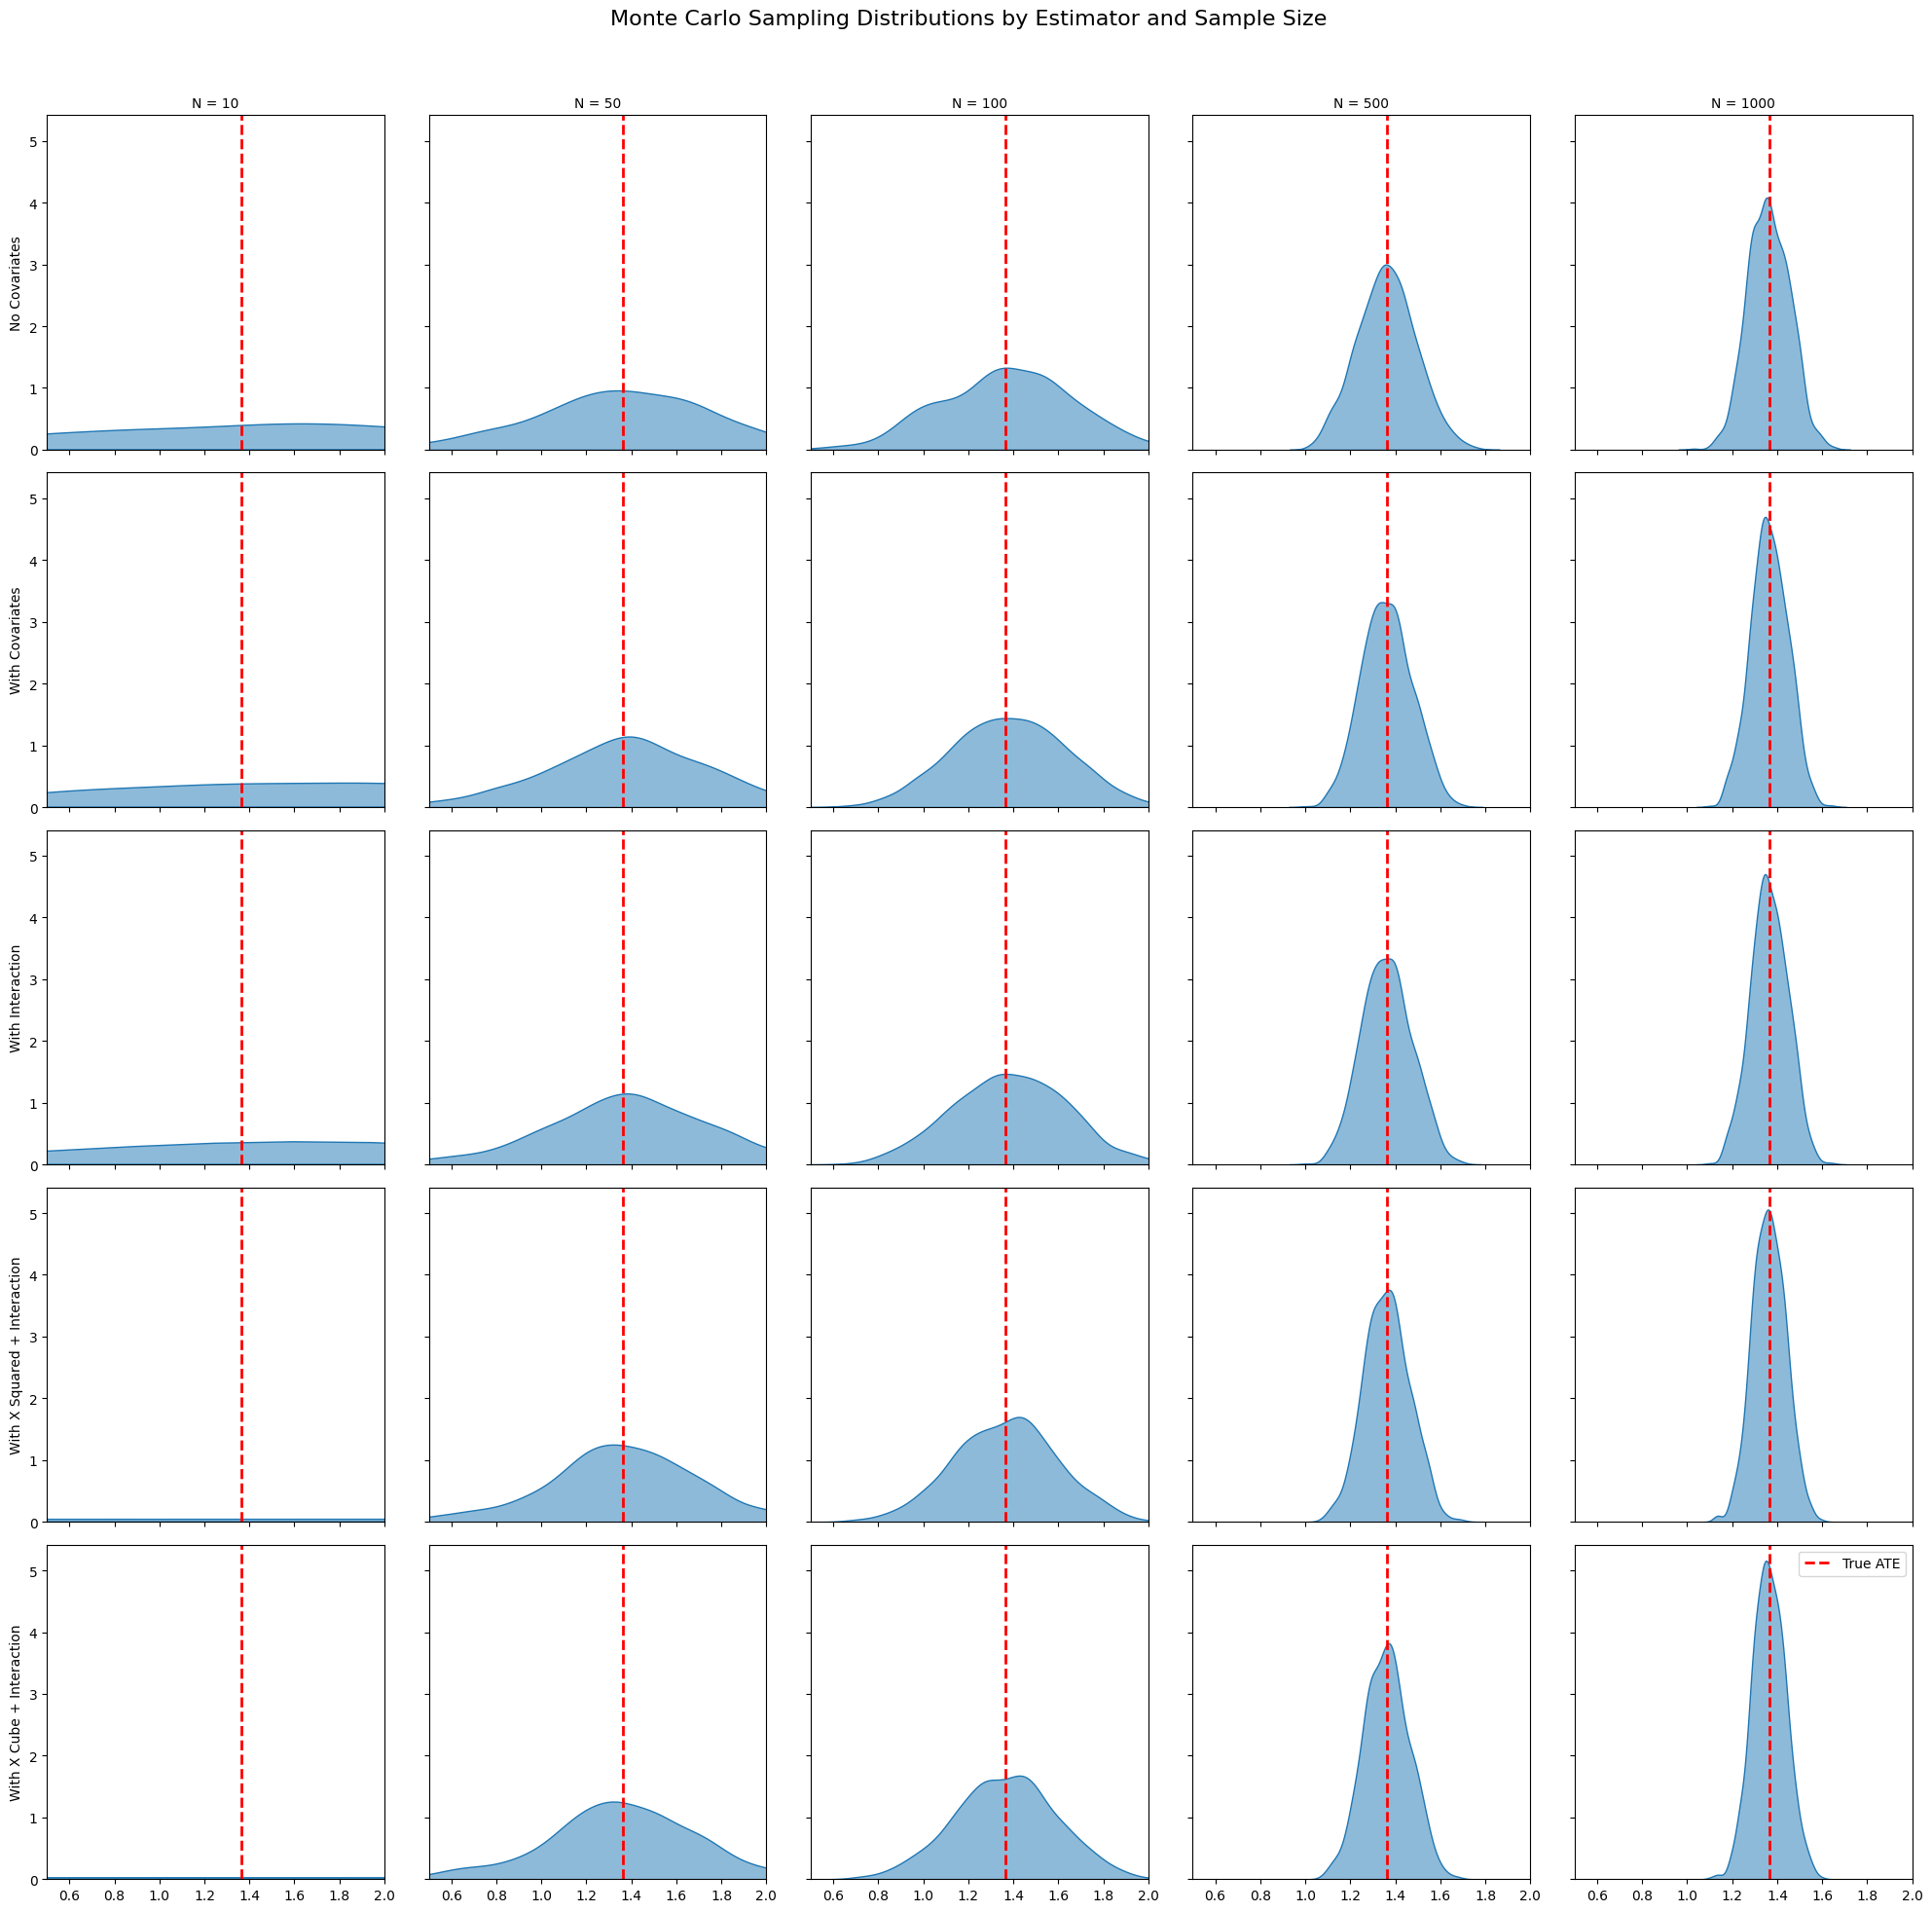

,Method,10,50,100,500,1000
0,No Covariates,0.966905,0.426878,0.296233,0.129933,0.092288
1,With Covariates,1.040999,0.373448,0.255345,0.111449,0.082016
2,With Interaction,2.122059,0.365943,0.254830,0.110825,0.082019
3,With X Cube + Interaction,61.285881,0.326145,0.227821,0.101176,0.073770
4,With X Squared + Interaction,36.176144,0.325828,0.229954,0.100854,0.073923


In [20]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Define the true model for generating data
def generate_data(N):
    X = np.random.uniform(-2, 2, N)
    epsilon_0 = np.random.normal(0, 0.5, N)
    epsilon_1 = np.random.normal(0, 0.5, N)
    Y_0 = 2 * np.sin(X) + X**2 + epsilon_0
    Y_1 = 3 * np.cos(X) + X**2 + epsilon_1
    T = np.random.binomial(1, 0.5, N)
    Y = np.where(T == 1, Y_1, Y_0)
    return pd.DataFrame({'X': X, 'T': T, 'Y_0': Y_0, 'Y_1': Y_1, 'Y': Y})

# Define regression estimators
def regression_no_covariates(data):
    model = sm.OLS(data['Y'], sm.add_constant(data['T'])).fit()
    return model.params['T']

def regression_with_covariates(data):
    model = sm.OLS(data['Y'], sm.add_constant(data[['T', 'X']])).fit()
    return model.params['T']

def regression_with_interaction(data):
    data['interaction'] = data['T'] * (data['X'] - data['X'].mean())
    model = sm.OLS(data['Y'], sm.add_constant(data[['T', 'X', 'interaction']])).fit()
    return model.params['T']

def regression_with_X_squared_and_interaction(data):
    data['X_squared'] = data['X']**2
    data['T_X'] = data['T'] * data['X']
    data['T_X_squared'] = data['T'] * data['X_squared']
    model = sm.OLS(data['Y'], sm.add_constant(data[['T', 'X', 'T_X', 'X_squared', 'T_X_squared']])).fit()
    E_X = data['X'].mean()
    E_X_squared = data['X_squared'].mean()
    b1 = model.params['T']
    b3 = model.params['T_X']
    b5 = model.params['T_X_squared']
    return b1 + b3 * E_X + b5 * E_X_squared

def regression_with_cubic_interaction(data):
    data['X_squared'] = data['X']**2
    data['X_cubed'] = data['X']**3
    data['T_X'] = data['T'] * data['X']
    data['T_X_squared'] = data['T'] * data['X_squared']
    data['T_X_cubed'] = data['T'] * data['X_cubed']
    model = sm.OLS(data['Y'], sm.add_constant(data[['T', 'X', 'T_X', 'X_squared', 'T_X_squared', 'X_cubed', 'T_X_cubed']])).fit()
    E_X = data['X'].mean()
    E_X_squared = data['X_squared'].mean()
    E_X_cubed = data['X_cubed'].mean()
    b1 = model.params['T']
    b3 = model.params['T_X']
    b5 = model.params['T_X_squared']
    b7 = model.params['T_X_cubed']
    return b1 + b3 * E_X + b5 * E_X_squared + b7 * E_X_cubed

# Monte Carlo Simulation
M = 1000  # Number of Monte Carlo iterations
sample_sizes = [10, 50, 100, 500, 1000]
true_ate = 1.364  # Theoretical ATE value
methods = ["No Covariates", "With Covariates", "With Interaction", "With X Squared + Interaction", "With X Cube + Interaction"]
results = {method: {N: [] for N in sample_sizes} for method in methods}

# Run Monte Carlo for each sample size and method
for N in sample_sizes:
    for _ in range(M):
        data = generate_data(N)
        results["No Covariates"][N].append(regression_no_covariates(data))
        results["With Covariates"][N].append(regression_with_covariates(data))
        results["With Interaction"][N].append(regression_with_interaction(data))
        results["With X Squared + Interaction"][N].append(regression_with_X_squared_and_interaction(data))
        results["With X Cube + Interaction"][N].append(regression_with_cubic_interaction(data))

# Compute and tabulate standard deviations of sampling distributions
stdev_results = []

for method in methods:
    for N in sample_sizes:
        stdev = np.std(results[method][N])  # Compute standard deviation of estimates
        stdev_results.append({
            "Method": method,
            "Sample Size (N)": N,
            "Standard Deviation": stdev
        })

# Add KDE plots for each method and sample size
fig, axes = plt.subplots(len(methods), len(sample_sizes), figsize=(20, 20), sharex=True, sharey=True)

for row, method in enumerate(methods):
    for col, N in enumerate(sample_sizes):
        ax = axes[row, col]
        sns.kdeplot(results[method][N], fill=True, alpha=0.5, ax=ax)
        ax.axvline(true_ate, color='red', linestyle='--', linewidth=2, label='True ATE')
        ax.set_xlim(0.5, 2.0)
        if row == 0:
            ax.set_title(f"N = {N}", fontsize=10)
        if col == 0:
            ax.set_ylabel(method, fontsize=10)
        if row == len(methods) - 1 and col == len(sample_sizes) - 1:
            ax.legend()

# Overall layout adjustments
plt.suptitle("Monte Carlo Sampling Distributions by Estimator and Sample Size", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Convert results to a DataFrame
stdev_df = pd.DataFrame(stdev_results)
stdev_pivot = pd.DataFrame(stdev_results).pivot(index="Method", columns="Sample Size (N)", values="Standard Deviation")
stdev_pivot.reset_index(inplace=True)
stdev_pivot.rename_axis(None, axis=1, inplace=True)  # Remove axis names for cleaner display
display(stdev_pivot)

# Potential Outcomes Framework: Multivalued Treatment Example

## Model
- $X \sim \text{Uniform}(-2, 2)$ represents an individual’s attribute (e.g., baseline characteristics).  
- $Y(0) = 1 + \sin(X) + \epsilon$, $Y(1) = 2 + 0.5 \cos(X) + \sin(X) + \epsilon$, $Y(2) = 3 + 0.7 \cos(X) + \sin(X) + \epsilon$, where $\epsilon \sim \mathcal{N}(0, 0.5)$.  
- $T \sim \text{Categorical}(p = [0.3, 0.4, 0.3])$ represents treatment assignment to one of three levels ($T = 0, 1, 2$).  
- $Y = Y(T)$ is the observed outcome.

## Estimands and Derivations
1. **ITE**:  
   - $ITE_1 = Y(1) - Y(0) = 1 + 0.5 \cos(X)$  
   - $ITE_2 = Y(2) - Y(0) = 2 + 0.7 \cos(X)$  

2. **ATE**:  
   - $ATE_1 = \mathbb{E}[Y(1) - Y(0)] = 1 + 0.25 \sin(2) \approx 1.227$  
   - $ATE_2 = \mathbb{E}[Y(2) - Y(0)] = 2 + 0.35 \sin(2) \approx 2.318$  

3. **ATT**:  
   - $ATT_1 = \mathbb{E}[Y(1) - Y(0) \mid T = 1] \approx ATE_1$  
   - $ATT_2 = \mathbb{E}[Y(2) - Y(0) \mid T = 2] \approx ATE_2$  

## Summary
- **ITE** captures the individual effect of each treatment level.  
- **ATE** provides the population-level average effect for each treatment.  
- **ATT** measures the treatment effect for individuals exposed to each treatment level.

/var/folders/b7/1tvk5qmx0ds9c6gk2lrlhv380000gn/T/ipykernel_31416/4152372941.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cate_means_1 = data.groupby(cate_bins)['ITE_1'].mean()
/var/folders/b7/1tvk5qmx0ds9c6gk2lrlhv380000gn/T/ipykernel_31416/4152372941.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cate_means_2 = data.groupby(cate_bins)['ITE_2'].mean()


True ATE for T=1: 1.228
Estimated ATE for T=1: 1.230
ATT for T=1: 1.229
True ATE for T=2: 2.320
Estimated ATE for T=2: 2.319
ATT for T=2: 2.320


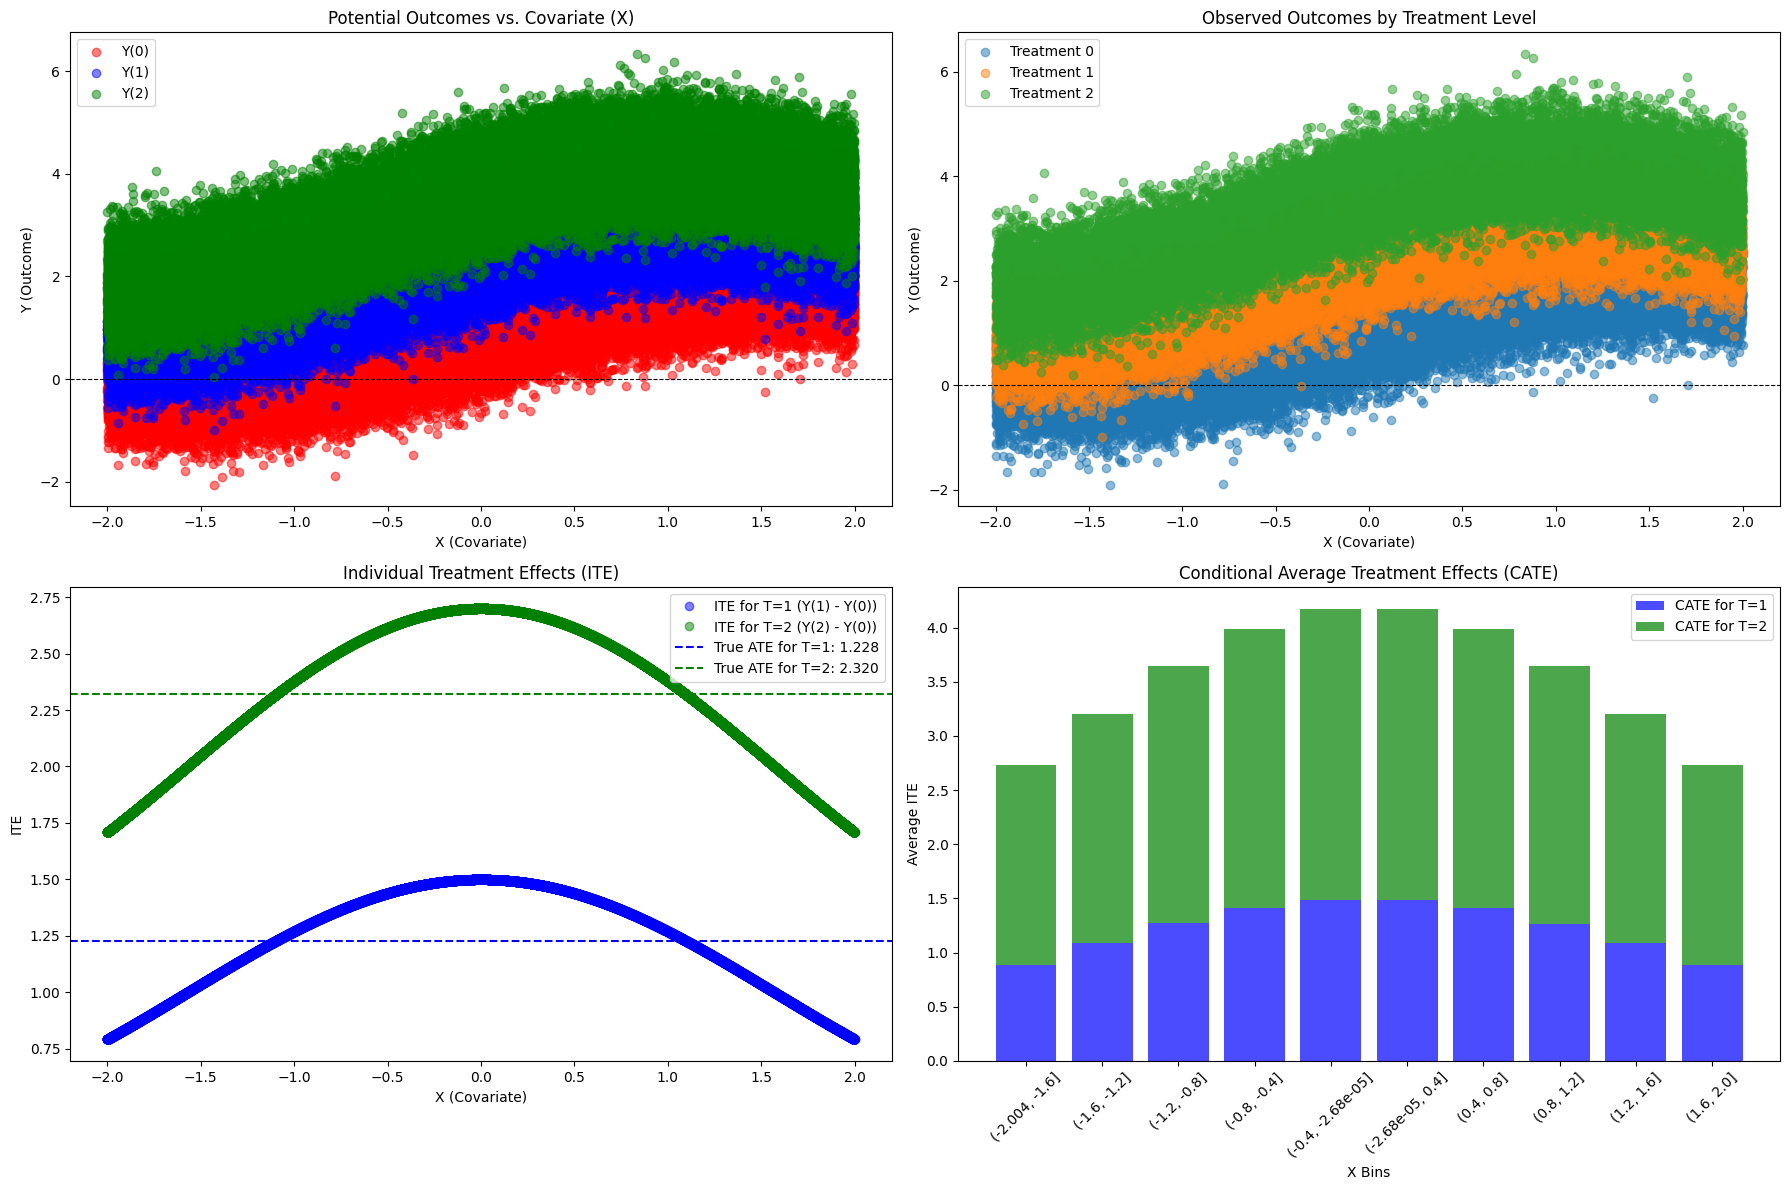

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the nonlinear DGP with 3 treatment levels and potential outcomes
def generate_multivalued_treatment_dgp(N):
    X = np.random.uniform(-2, 2, N)  # Covariate
    epsilon = np.random.normal(0, 0.5, N)  # Noise term
    T = np.random.choice([0, 1, 2], size=N, p=[0.3, 0.4, 0.3])  # 3 treatment levels
    Y_0 = 1 + np.sin(X) + epsilon  # Potential outcome for T=0
    Y_1 = 2 + 0.5 * np.cos(X) + np.sin(X) + epsilon  # Potential outcome for T=1
    Y_2 = 3 + 0.7 * np.cos(X) + np.sin(X) + epsilon  # Potential outcome for T=2
    Y = np.where(T == 0, Y_0, np.where(T == 1, Y_1, Y_2))  # Observed outcome
    return pd.DataFrame({'X': X, 'T': T, 'Y': Y, 'Y_0': Y_0, 'Y_1': Y_1, 'Y_2': Y_2})

# Generate data with N = 100,000
N = 100_000
data = generate_multivalued_treatment_dgp(N)

# Compute individual treatment effects (ITE) for T=1 and T=2
data['ITE_1'] = data['Y_1'] - data['Y_0']
data['ITE_2'] = data['Y_2'] - data['Y_0']

# Estimated ATE and ATT for each treatment level
estimated_ate_1 = data.loc[data['T'] == 1, 'Y'].mean() - data.loc[data['T'] == 0, 'Y'].mean()
estimated_ate_2 = data.loc[data['T'] == 2, 'Y'].mean() - data.loc[data['T'] == 0, 'Y'].mean()
true_ate_1 = data['ITE_1'].mean()
true_ate_2 = data['ITE_2'].mean()
att_1 = data.loc[data['T'] == 1, 'ITE_1'].mean()
att_2 = data.loc[data['T'] == 2, 'ITE_2'].mean()

# Visualization
plt.figure(figsize=(18, 12))

# Scatterplot of potential outcomes
plt.subplot(2, 2, 1)
plt.scatter(data['X'], data['Y_0'], alpha=0.5, label='Y(0)', color='red')
plt.scatter(data['X'], data['Y_1'], alpha=0.5, label='Y(1)', color='blue')
plt.scatter(data['X'], data['Y_2'], alpha=0.5, label='Y(2)', color='green')
plt.title('Potential Outcomes vs. Covariate (X)')
plt.xlabel('X (Covariate)')
plt.ylabel('Y (Outcome)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()

# Observed outcomes
plt.subplot(2, 2, 2)
for t in [0, 1, 2]:
    subset = data[data['T'] == t]
    plt.scatter(subset['X'], subset['Y'], alpha=0.5, label=f'Treatment {t}')
plt.title('Observed Outcomes by Treatment Level')
plt.xlabel('X (Covariate)')
plt.ylabel('Y (Outcome)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()

# ITE visualization
plt.subplot(2, 2, 3)
plt.plot(data['X'], data['ITE_1'], 'o', alpha=0.5, label='ITE for T=1 (Y(1) - Y(0))', color='blue')
plt.plot(data['X'], data['ITE_2'], 'o', alpha=0.5, label='ITE for T=2 (Y(2) - Y(0))', color='green')
plt.axhline(true_ate_1, color='blue', linestyle='--', label=f'True ATE for T=1: {true_ate_1:.3f}')
plt.axhline(true_ate_2, color='green', linestyle='--', label=f'True ATE for T=2: {true_ate_2:.3f}')
plt.title('Individual Treatment Effects (ITE)')
plt.xlabel('X (Covariate)')
plt.ylabel('ITE')
plt.legend()

# CATE visualization
plt.subplot(2, 2, 4)
cate_bins = pd.cut(data['X'], bins=10)
cate_means_1 = data.groupby(cate_bins)['ITE_1'].mean()
cate_means_2 = data.groupby(cate_bins)['ITE_2'].mean()
plt.bar(cate_means_1.index.astype(str), cate_means_1, alpha=0.7, color='blue', label='CATE for T=1')
plt.bar(cate_means_2.index.astype(str), cate_means_2, alpha=0.7, color='green', label='CATE for T=2', bottom=cate_means_1)
plt.title('Conditional Average Treatment Effects (CATE)')
plt.xlabel('X Bins')
plt.ylabel('Average ITE')
plt.xticks(rotation=45)
plt.legend()

# Show results
print(f"True ATE for T=1: {true_ate_1:.3f}")
print(f"Estimated ATE for T=1: {estimated_ate_1:.3f}")
print(f"ATT for T=1: {att_1:.3f}")
print(f"True ATE for T=2: {true_ate_2:.3f}")
print(f"Estimated ATE for T=2: {estimated_ate_2:.3f}")
print(f"ATT for T=2: {att_2:.3f}")

plt.tight_layout()
plt.show()

## Observational Data and Propensity Scores

/var/folders/b7/1tvk5qmx0ds9c6gk2lrlhv380000gn/T/ipykernel_31416/857817048.py:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cate_means = data.groupby(cate_bins)['ITE'].mean()


True ATE: 1.365
Estimated ATE (Simple Diff): 2.466
ATT: 0.266


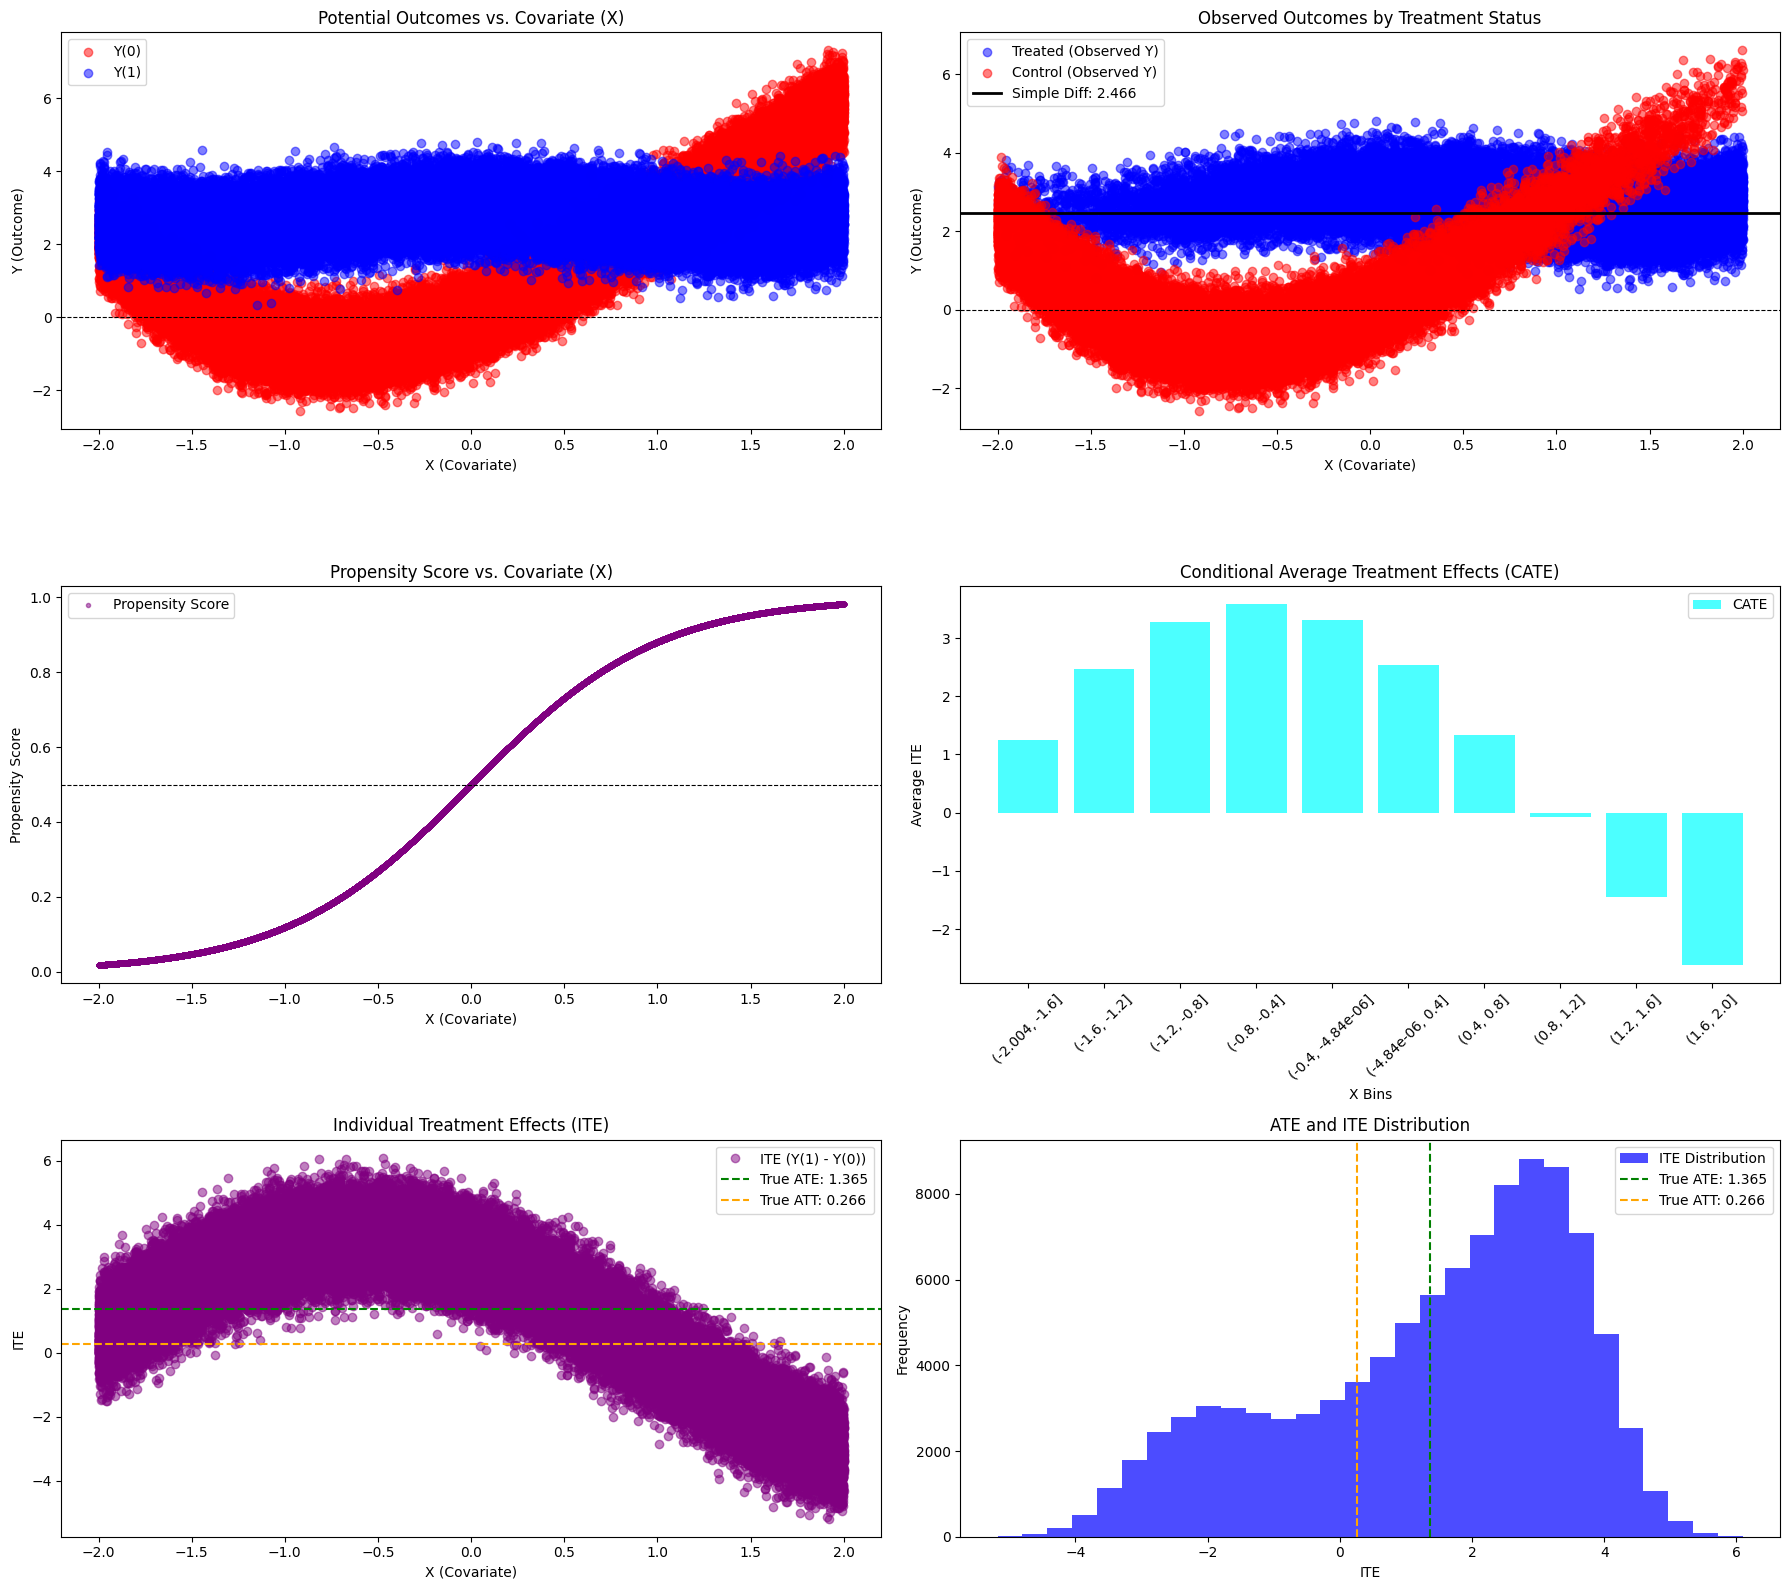

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate covariates and potential outcomes
n = 100_000
X = np.random.uniform(-2, 2, n)
epsilon_0 = np.random.normal(0, 0.5, n)
epsilon_1 = np.random.normal(0, 0.5, n)
Y_0 = 2 * np.sin(X) + X**2 + epsilon_0
Y_1 = 3 * np.cos(X) + X**2 + epsilon_1

# Define a propensity score model and assign treatment
propensity_score = 1 / (1 + np.exp(-2 * X))  # Nonlinear function of X
T = np.random.binomial(1, propensity_score)
Y = np.where(T == 1, Y_1, Y_0)

# Store data in a DataFrame
data = pd.DataFrame({
    'X': X,
    'T': T,
    'Y_0': Y_0,
    'Y_1': Y_1,
    'Y': Y,
    'Propensity_Score': propensity_score
})

# Compute treatment effects
data['ITE'] = data['Y_1'] - data['Y_0']
estimated_ate = data.loc[data['T'] == 1, 'Y'].mean() - data.loc[data['T'] == 0, 'Y'].mean()
true_ate = data['ITE'].mean()
att = data.loc[data['T'] == 1, 'ITE'].mean()

# Visualization including ITE and ATE plots with the simple difference of means added
plt.figure(figsize=(18, 16))

# Scatterplot of potential outcomes
plt.subplot(3, 2, 1)
plt.scatter(data['X'], data['Y_0'], alpha=0.5, label='Y(0)', color='red')
plt.scatter(data['X'], data['Y_1'], alpha=0.5, label='Y(1)', color='blue')
plt.title('Potential Outcomes vs. Covariate (X)')
plt.xlabel('X (Covariate)')
plt.ylabel('Y (Outcome)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()

# Observed outcomes
plt.subplot(3, 2, 2)
treated = data[data['T'] == 1]
control = data[data['T'] == 0]
plt.scatter(treated['X'], treated['Y'], alpha=0.5, label='Treated (Observed Y)', color='blue')
plt.scatter(control['X'], control['Y'], alpha=0.5, label='Control (Observed Y)', color='red')
plt.axhline(estimated_ate, color='black', linestyle='-', linewidth=2, label=f'Simple Diff: {estimated_ate:.3f}')
plt.title('Observed Outcomes by Treatment Status')
plt.xlabel('X (Covariate)')
plt.ylabel('Y (Outcome)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()

# Propensity score
plt.subplot(3, 2, 3)
plt.plot(data['X'], data['Propensity_Score'], '.', alpha=0.5, color='purple', label='Propensity Score')
plt.title('Propensity Score vs. Covariate (X)')
plt.xlabel('X (Covariate)')
plt.ylabel('Propensity Score')
plt.axhline(0.5, color='black', linestyle='--', linewidth=0.8)
plt.legend()

# CATE visualization
plt.subplot(3, 2, 4)
cate_bins = pd.cut(data['X'], bins=10)
cate_means = data.groupby(cate_bins)['ITE'].mean()
plt.bar(cate_means.index.astype(str), cate_means, alpha=0.7, color='cyan', label='CATE')
plt.title('Conditional Average Treatment Effects (CATE)')
plt.xlabel('X Bins')
plt.ylabel('Average ITE')
plt.xticks(rotation=45)
plt.legend()

# ITE visualization
plt.subplot(3, 2, 5)
plt.plot(data['X'], data['ITE'], 'o', alpha=0.5, label='ITE (Y(1) - Y(0))', color='purple')
plt.axhline(true_ate, color='green', linestyle='--', label=f'True ATE: {true_ate:.3f}')
plt.axhline(att, color='orange', linestyle='--', label=f'True ATT: {att:.3f}')
plt.title('Individual Treatment Effects (ITE)')
plt.xlabel('X (Covariate)')
plt.ylabel('ITE')
plt.legend()

# ATE histogram
plt.subplot(3, 2, 6)
plt.hist(data['ITE'], bins=30, alpha=0.7, color='blue', label='ITE Distribution')
plt.axvline(true_ate, color='green', linestyle='--', label=f'True ATE: {true_ate:.3f}')
plt.axvline(att, color='orange', linestyle='--', label=f'True ATT: {att:.3f}')
plt.title('ATE and ITE Distribution')
plt.xlabel('ITE')
plt.ylabel('Frequency')
plt.legend()

# Print key results
print(f"True ATE: {true_ate:.3f}")
print(f"Estimated ATE (Simple Diff): {estimated_ate:.3f}")
print(f"ATT: {att:.3f}")

plt.tight_layout()
plt.show()


# Regression-Based ATE Estimation with Propensity Scores

Incorporating propensity scores allows adjustment for treatment assignment bias and estimation of causal effects.

1. **No Covariates**:  
   $Y = b_0 + b_1 T + e$

2. **With Covariates**:  
   $Y = b_0 + b_1 T + b_2 X + e$

3. **With Interaction**:  
   $Y = b_0 + b_1 T + b_2 X + b_3 T(X - \bar{X}) + e$

4. **With $X^2$ and Interaction**:  
   $Y = b_0 + b_1 T + b_2 X + b_3 T X + b_4 X^2 + b_5 T X^2 + e$  

   $\text{ATE} = b_1 + b_3 \mathbb{E}[X] + b_5 \mathbb{E}[X^2]$

5. **With Propensity Score**:  
   $Y = b_0 + b_1 T + b_2 P + e$, where $P$ is the propensity score.

6. **With Propensity Score + Interaction**:  
   $Y = b_0 + b_1 T + b_2 P + b_3 T(P - \bar{P}) + e$

7. **With Propensity Score Squared + Interaction**:  
   $Y = b_0 + b_1 T + b_2 P + b_3 T(P - \bar{P}) + b_4 P^2 + b_5 T(P^2 - \overline{P^2}) + e$

   $\text{ATE} = b_1 + b_3 \mathbb{E}[P] + b_5 \mathbb{E}[P^2]$

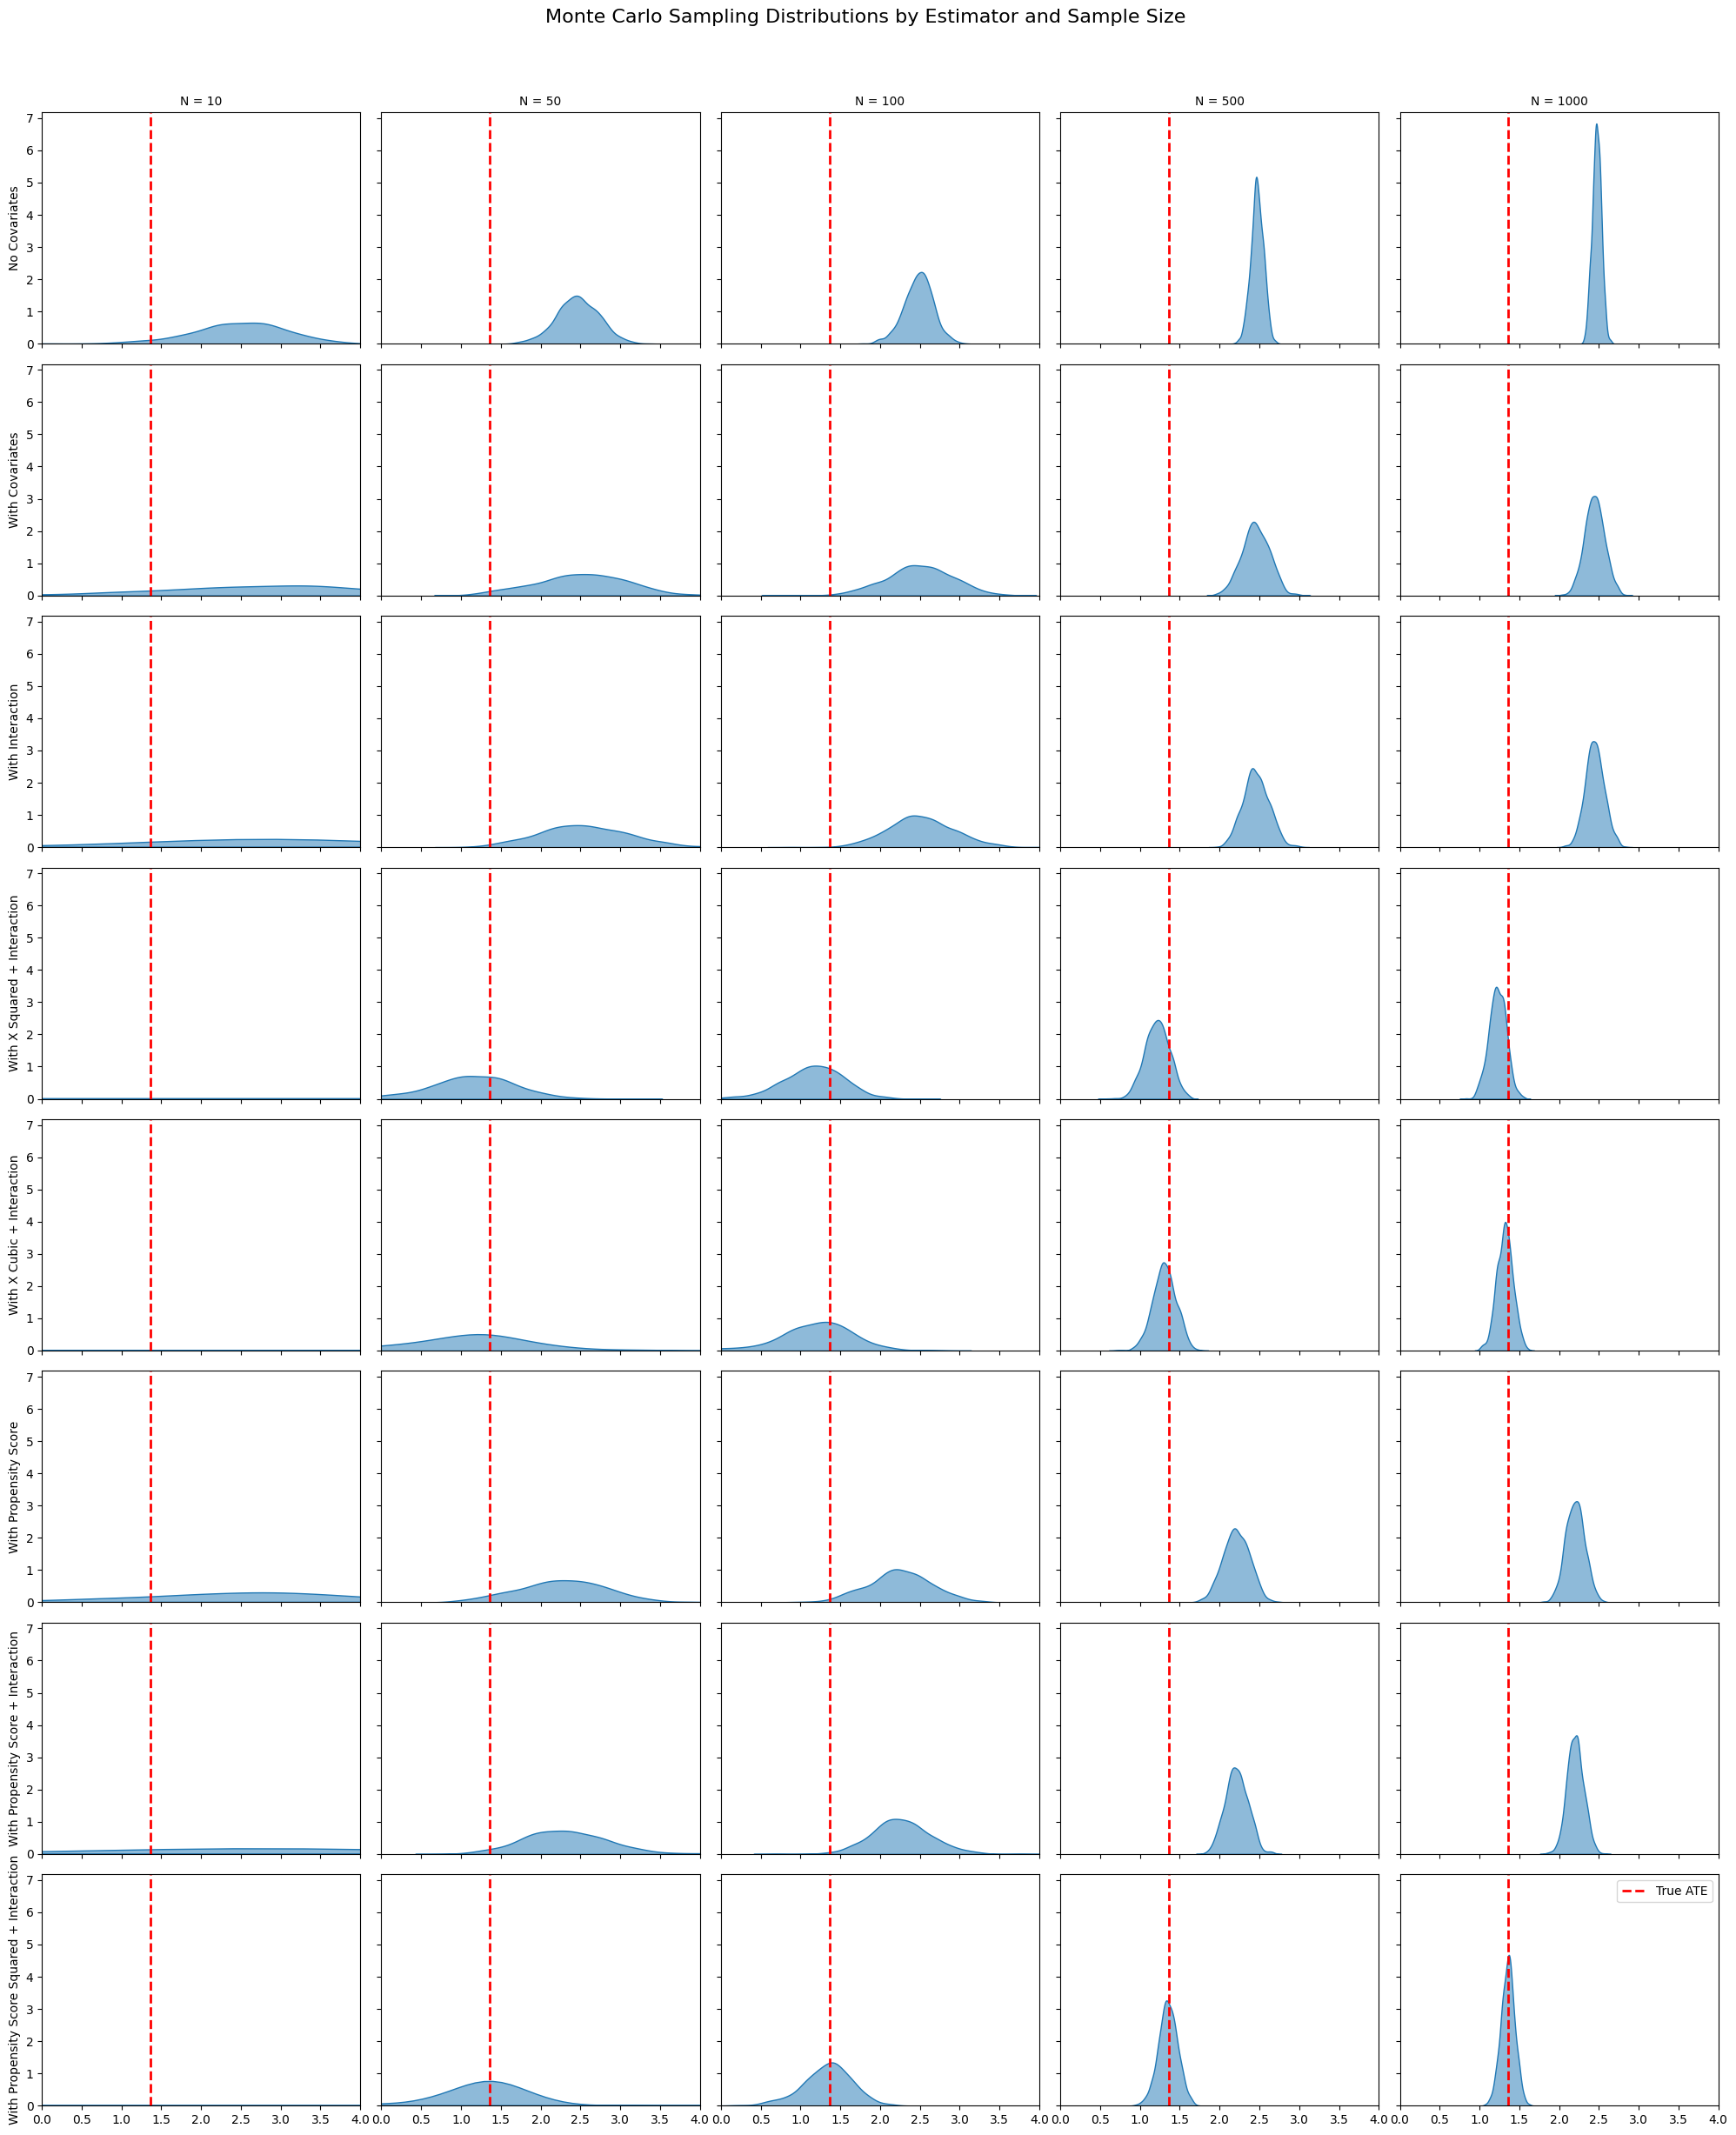

Standard Deviations Around True ATE:


,Method,10,50,100,500,1000
0,No Covariates,0.627649,0.267111,0.184829,0.080557,0.057379
1,With Covariates,1.364191,0.580626,0.417004,0.173114,0.124386
2,With Interaction,3.188075,0.589021,0.408441,0.162961,0.118550
3,With Propensity Score,1.737213,0.566692,0.403216,0.166741,0.119746
4,With Propensity Score + Interaction,6.582957,0.575617,0.369811,0.142799,0.105412
5,With Propensity Score Squared + Interaction,7505.287288,0.995915,0.341769,0.121642,0.087767
6,With X Cubic + Interaction,10997.601442,1.224929,0.533751,0.146219,0.101525
7,With X Squared + Interaction,400.360322,0.621073,0.395861,0.156485,0.109378



Bias of Estimates from True ATE:


,Method,10,50,100,500,1000
0,No Covariates,1.095614,1.102317,1.116240,1.106643,1.107959
1,With Covariates,1.446101,1.156979,1.124041,1.088104,1.080488
2,With Interaction,1.617421,1.198914,1.147027,1.092210,1.082745
3,With Propensity Score,1.374455,0.918770,0.875606,0.844453,0.837101
4,With Propensity Score + Interaction,2.334920,0.972531,0.900552,0.849064,0.839648
5,With Propensity Score Squared + Interaction,-276.996839,-0.185122,-0.039718,-0.013131,-0.008602
6,With X Cubic + Interaction,246.906664,-0.321861,-0.199175,-0.057441,-0.045908
7,With X Squared + Interaction,-18.646602,-0.264966,-0.210243,-0.149874,-0.137571


In [25]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Define the true model for generating data
def generate_data(N):
    X = np.random.uniform(-2, 2, N)
    epsilon_0 = np.random.normal(0, 0.5, N)
    epsilon_1 = np.random.normal(0, 0.5, N)
    Y_0 = 2 * np.sin(X) + X**2 + epsilon_0
    Y_1 = 3 * np.cos(X) + X**2 + epsilon_1
    propensity_score = 1 / (1 + np.exp(-2 * X))  # Nonlinear function of X
    T = np.random.binomial(1, propensity_score)
    Y = np.where(T == 1, Y_1, Y_0)
    return pd.DataFrame({'X': X, 'T': T, 'Y_0': Y_0, 'Y_1': Y_1, 'Y': Y, 'Propensity_Score': propensity_score})

# Define regression estimators
def regression_no_covariates(data):
    model = sm.OLS(data['Y'], sm.add_constant(data['T'])).fit()
    return model.params['T']

def regression_with_covariates(data):
    model = sm.OLS(data['Y'], sm.add_constant(data[['T', 'X']])).fit()
    return model.params['T']

def regression_with_interaction(data):
    data['interaction'] = data['T'] * (data['X'] - data['X'].mean())
    model = sm.OLS(data['Y'], sm.add_constant(data[['T', 'X', 'interaction']])).fit()
    return model.params['T']

def regression_with_X_squared_and_interaction(data):
    data['X_squared'] = data['X']**2
    data['T_X'] = data['T'] * (data['X'] - data['X'].mean())
    data['T_X_squared'] = data['T'] * (data['X_squared'] - data['X_squared'].mean())
    model = sm.OLS(data['Y'], sm.add_constant(data[['T', 'X', 'T_X', 'X_squared', 'T_X_squared']])).fit()
    return model.params['T']

def regression_with_X_cubic_and_interaction(data):
    data['X_squared'] = data['X']**2
    data['X_cubed'] = data['X']**3
    data['T_X'] = data['T'] * (data['X'] - data['X'].mean())
    data['T_X_squared'] = data['T'] * (data['X_squared'] - data['X_squared'].mean())
    data['T_X_cubed'] = data['T'] * (data['X_cubed'] - data['X_cubed'].mean())
    model = sm.OLS(data['Y'], sm.add_constant(data[['T', 'X', 'T_X', 'X_squared', 'T_X_squared', 'X_cubed', 'T_X_cubed']])).fit()
    return model.params['T']

def regression_with_propensity_score(data):
    model = sm.OLS(data['Y'], sm.add_constant(data[['T', 'Propensity_Score']])).fit()
    return model.params['T']

def regression_with_propensity_score_and_interaction(data):
    data['T_Propensity'] = data['T'] * (data['Propensity_Score'] - data['Propensity_Score'].mean())
    model = sm.OLS(data['Y'], sm.add_constant(data[['T', 'Propensity_Score', 'T_Propensity']])).fit()
    return model.params['T']

def regression_with_propensity_score_squared_and_interaction(data):
    data['Propensity_Score_Squared'] = data['Propensity_Score']**2
    data['T_Propensity'] = data['T'] * (data['Propensity_Score'] - data['Propensity_Score'].mean())
    data['T_Propensity_Squared'] = data['T'] * (data['Propensity_Score_Squared'] - data['Propensity_Score_Squared'].mean())
    model = sm.OLS(data['Y'], sm.add_constant(data[['T', 'Propensity_Score', 'T_Propensity', 'Propensity_Score_Squared', 'T_Propensity_Squared']])).fit()
    return model.params['T']

# Monte Carlo Simulation
M = 1000  # Number of Monte Carlo iterations
sample_sizes = [10, 50, 100, 500, 1000]
true_ate = 1.364  # Theoretical ATE value
methods = [
    "No Covariates",
    "With Covariates",
    "With Interaction",
    "With X Squared + Interaction",
    "With X Cubic + Interaction",
    "With Propensity Score",
    "With Propensity Score + Interaction",
    "With Propensity Score Squared + Interaction"
]
results = {method: {N: [] for N in sample_sizes} for method in methods}

# Run Monte Carlo for each sample size and method
for N in sample_sizes:
    for _ in range(M):
        data = generate_data(N)
        results["No Covariates"][N].append(regression_no_covariates(data))
        results["With Covariates"][N].append(regression_with_covariates(data))
        results["With Interaction"][N].append(regression_with_interaction(data))
        results["With X Squared + Interaction"][N].append(regression_with_X_squared_and_interaction(data))
        results["With X Cubic + Interaction"][N].append(regression_with_X_cubic_and_interaction(data))
        results["With Propensity Score"][N].append(regression_with_propensity_score(data))
        results["With Propensity Score + Interaction"][N].append(regression_with_propensity_score_and_interaction(data))
        results["With Propensity Score Squared + Interaction"][N].append(regression_with_propensity_score_squared_and_interaction(data))

# Add KDE plots for each method and sample size
fig, axes = plt.subplots(len(methods), len(sample_sizes), figsize=(20, 25), sharex=True, sharey=True)

for row, method in enumerate(methods):
    for col, N in enumerate(sample_sizes):
        ax = axes[row, col]
        sns.kdeplot(results[method][N], fill=True, alpha=0.5, ax=ax)
        ax.axvline(true_ate, color='red', linestyle='--', linewidth=2, label='True ATE')
        ax.set_xlim(0.0, 4.0)
        if row == 0:
            ax.set_title(f"N = {N}", fontsize=10)
        if col == 0:
            ax.set_ylabel(method, fontsize=10)
        if row == len(methods) - 1 and col == len(sample_sizes) - 1:
            ax.legend()

plt.suptitle("Monte Carlo Sampling Distributions by Estimator and Sample Size", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Compute and tabulate standard deviations
stdev_results = []

for method in methods:
    for N in sample_sizes:
        stdev = np.std(results[method][N])
        stdev_results.append({"Method": method, "Sample Size (N)": N, "Standard Deviation": stdev})

# Compute standard deviations and bias for each method and sample size
stdev_results = []
bias_results = []

for method in methods:
    for N in sample_sizes:
        estimates = results[method][N]
        stdev = np.std(estimates)  # Standard deviation of estimates
        bias = np.mean(estimates) - true_ate  # Bias from the true ATE
        stdev_results.append({"Method": method, "Sample Size (N)": N, "Standard Deviation": stdev})
        bias_results.append({"Method": method, "Sample Size (N)": N, "Bias": bias})

# Convert to DataFrames and pivot for better presentation
stdev_df = pd.DataFrame(stdev_results)
bias_df = pd.DataFrame(bias_results)

stdev_pivot = stdev_df.pivot(index="Method", columns="Sample Size (N)", values="Standard Deviation")
bias_pivot = bias_df.pivot(index="Method", columns="Sample Size (N)", values="Bias")

# Reset index and clean up for display
stdev_pivot.reset_index(inplace=True)
stdev_pivot.rename_axis(None, axis=1, inplace=True)

bias_pivot.reset_index(inplace=True)
bias_pivot.rename_axis(None, axis=1, inplace=True)

# Display the tables
print("Standard Deviations Around True ATE:")
display(stdev_pivot)

print("\nBias of Estimates from True ATE:")
display(bias_pivot)



# Parametric Causal Model

## Model
- $\ln(Y(0)) \sim \mathcal{N}(\mu_c, \sigma_c^2)$, $\ln(Y(1)) \sim \mathcal{N}(\mu_t, \sigma_t^2)$  
- $T \sim \text{Bernoulli}(0.5)$ indicates random treatment assignment.  
- $Y = \exp(\ln(Y(1)))$ if $T=1$, else $Y = \exp(\ln(Y(0)))$.

## Estimands
1. **ATE (Analytical)**:  
   $\tau = \exp\left(\mu_t + \frac{1}{2} \sigma_t^2\right) - \exp\left(\mu_c + \frac{1}{2} \sigma_c^2\right)$  

2. **ATE (Simulated)**:  
   $\tau = \mathbb{E}[Y(1)] - \mathbb{E}[Y(0)]$  

## Results
- **Analytical ATE**: $\approx 10.69$  
- **Simulated ATE**: $\approx 10.72$  

## Visualizations
1. **Histograms**: Distributions of $Y(0)$, $Y(1)$, and observed outcomes.  
2. **Scatterplot**: Observed outcomes with the analytical ATE as a reference.

Analytical ATE: 5.468
Simulated ATE: 5.256


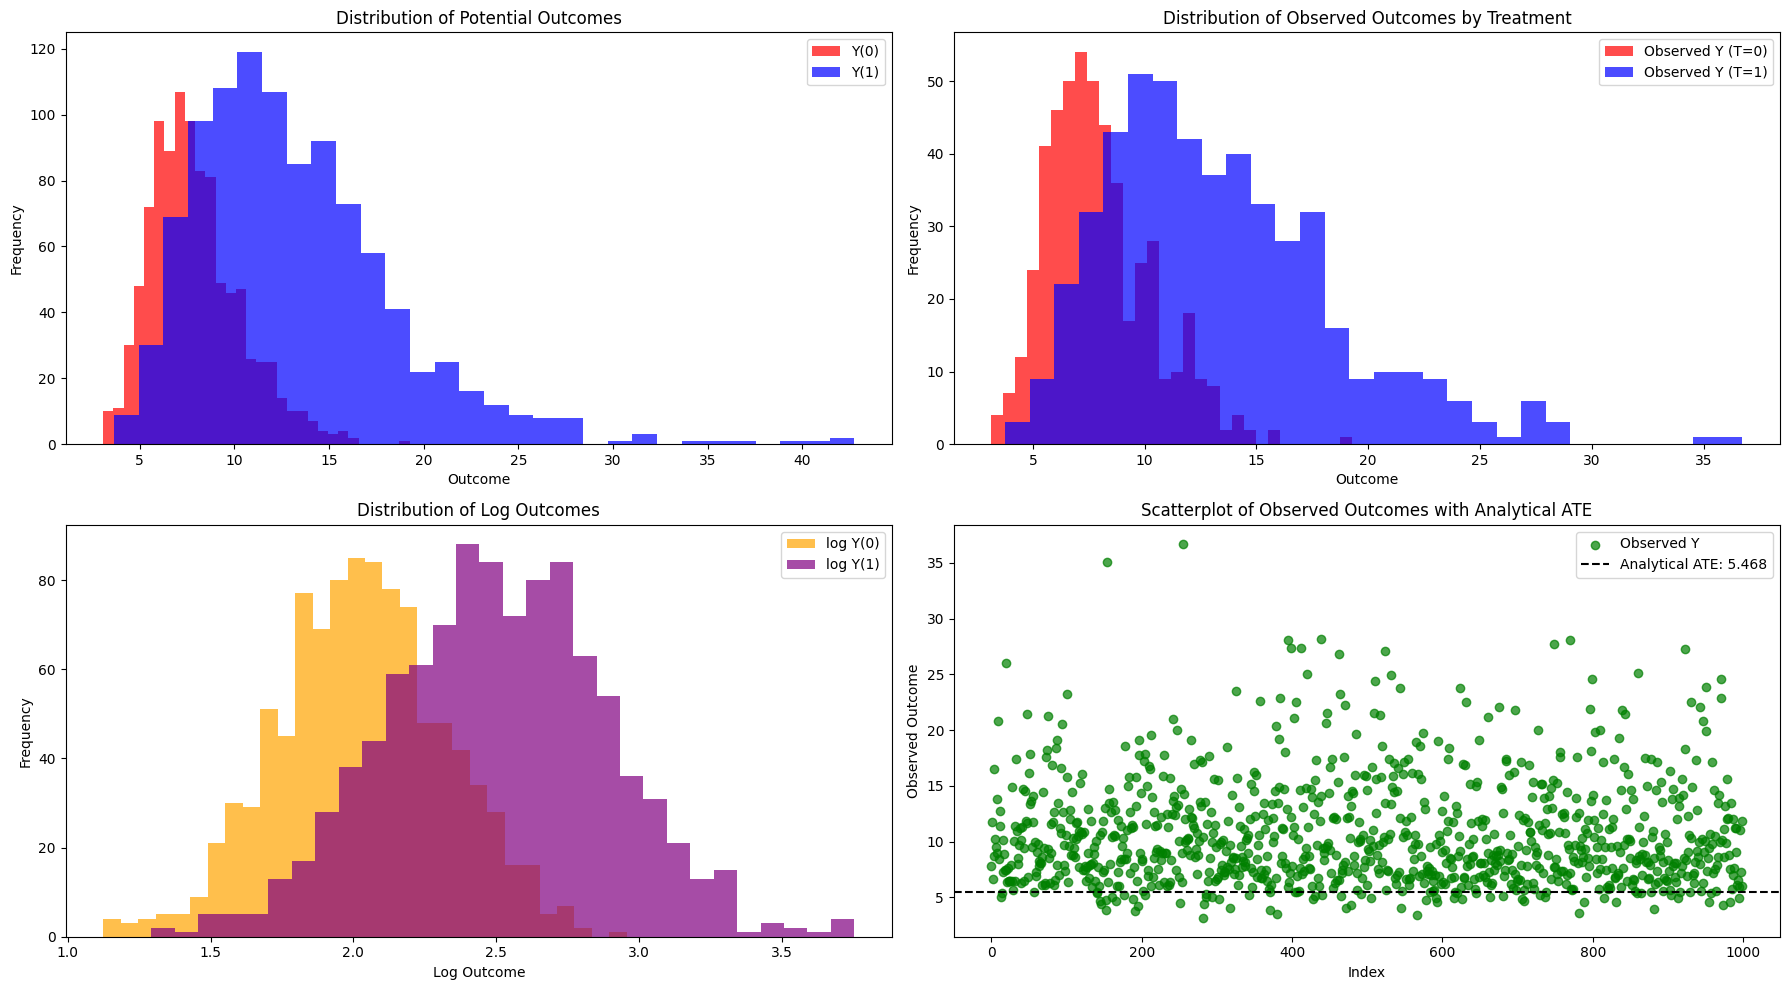

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters for the simulation
N = 1000  # Sample size
mu_c = 2.0  # Mean log outcome under control
mu_t = 2.5  # Mean log outcome under treatment
sigma_c = 0.3  # Standard deviation of log outcomes under control
sigma_t = 0.4  # Standard deviation of log outcomes under treatment

# Simulate treatment assignment
T = np.random.binomial(1, 0.5, N)  # Random treatment assignment with P(T=1) = 0.5

# Simulate log outcomes based on treatment
log_Y_0 = np.random.normal(mu_c, sigma_c, N)  # Log outcomes under control
log_Y_1 = np.random.normal(mu_t, sigma_t, N)  # Log outcomes under treatment

# Observed log outcomes based on treatment assignment
log_Y_obs = np.where(T == 1, log_Y_1, log_Y_0)

# Transform log outcomes to the original scale
Y_0 = np.exp(log_Y_0)  # Potential outcome under control
Y_1 = np.exp(log_Y_1)  # Potential outcome under treatment
Y_obs = np.exp(log_Y_obs)  # Observed outcome

# Compute ATE analytically
ate_analytical = np.exp(mu_t + 0.5 * sigma_t**2) - np.exp(mu_c + 0.5 * sigma_c**2)

# Compute ATE from simulated data
ate_simulated = np.mean(Y_1) - np.mean(Y_0)

# Store the data
data = pd.DataFrame({'T': T, 'Y_0': Y_0, 'Y_1': Y_1, 'Y_obs': Y_obs})

# Results
print(f"Analytical ATE: {ate_analytical:.3f}")
print(f"Simulated ATE: {ate_simulated:.3f}")

# Visualization
plt.figure(figsize=(18, 10))

# Histogram of potential outcomes
plt.subplot(2, 2, 1)
plt.hist(Y_0, bins=30, alpha=0.7, label='Y(0)', color='red')
plt.hist(Y_1, bins=30, alpha=0.7, label='Y(1)', color='blue')
plt.title('Distribution of Potential Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.legend()

# Observed outcomes by treatment
plt.subplot(2, 2, 2)
plt.hist(data[data['T'] == 0]['Y_obs'], bins=30, alpha=0.7, label='Observed Y (T=0)', color='red')
plt.hist(data[data['T'] == 1]['Y_obs'], bins=30, alpha=0.7, label='Observed Y (T=1)', color='blue')
plt.title('Distribution of Observed Outcomes by Treatment')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.legend()

# Log outcomes
plt.subplot(2, 2, 3)
plt.hist(log_Y_0, bins=30, alpha=0.7, label='log Y(0)', color='orange')
plt.hist(log_Y_1, bins=30, alpha=0.7, label='log Y(1)', color='purple')
plt.title('Distribution of Log Outcomes')
plt.xlabel('Log Outcome')
plt.ylabel('Frequency')
plt.legend()

# Scatterplot of Y_obs
plt.subplot(2, 2, 4)
plt.scatter(range(len(Y_obs)), Y_obs, alpha=0.7, color='green', label='Observed Y')
plt.axhline(ate_analytical, color='black', linestyle='--', label=f'Analytical ATE: {ate_analytical:.3f}')
plt.title('Scatterplot of Observed Outcomes with Analytical ATE')
plt.xlabel('Index')
plt.ylabel('Observed Outcome')
plt.legend()

plt.tight_layout()
plt.show()


# Likelihood, Estimation and Standard Errors

## Likelihood Derivation
1. Observed Data:  
   - $Y^{\text{obs}}$: Observed outcomes.  
   - $T$: Treatment assignment.

2. Likelihood:  
   The likelihood of the observed data is  

   $$L(\mu_c, \mu_t, \sigma_c, \sigma_t) = \prod_{i=1}^N \left[f(Y_i^{\text{obs}} \mid \mu_c, \sigma_c)^{1-T_i} \cdot f(Y_i^{\text{obs}} \mid \mu_t, \sigma_t)^{T_i}\right]$$
                                                                                                                             
   where  
   For $T_i = 0$:  
   
   $$f(Y_i^{\text{obs}} \mid \mu_c, \sigma_c) = \frac{1}{Y_i^{\text{obs}} \sigma_c \sqrt{2\pi}} \exp\left(-\frac{\left(\ln(Y_i^{\text{obs}}) - \mu_c\right)^2}{2\sigma_c^2}\right)$$
          
   For $T_i = 1$:  
   
   $$f(Y_i^{\text{obs}} \mid \mu_t, \sigma_t) = \frac{1}{Y_i^{\text{obs}} \sigma_t \sqrt{2\pi}} \exp\left(-\frac{\left(\ln(Y_i^{\text{obs}}) - \mu_t\right)^2}{2\sigma_t^2}\right)$$

3. Log-Likelihood:  

   $$\ell(\mu_c, \mu_t, \sigma_c, \sigma_t) = \sum_{i=1}^N \left[(1-T_i) \ln f(Y_i^{\text{obs}} \mid \mu_c, \sigma_c) + T_i \ln f(Y_i^{\text{obs}} \mid \mu_t, \sigma_t)\right]$$

## Hessian and Standard Errors
1. Gradient:  
   First derivatives of the log-likelihood with respect to $\mu_c, \mu_t, \sigma_c, \sigma_t$.

2. Hessian Matrix:  
   Second derivatives of the log-likelihood:  

   $$H_{jk} = \frac{\partial^2 \ell}{\partial \theta_j \partial \theta_k}$$

3. Standard Errors:  
   From the inverse Hessian:  

   $$\text{StdErr}(\theta_j) = \sqrt{\left[\text{Hessian}^{-1}\right]_{jj}}$$

2.0 2.5 0.3 0.4


,Parameter,Estimate,StdErr,t-value,p-value,95% CI
0,mu_c,2.034862,0.012970,156.883970,-311.767940,"(2.0094396507705867, 2.0602839677732425)"
1,mu_t,2.520906,0.016884,149.307502,-296.615003,"(2.4878137888236576, 2.5539990308152603)"
2,sigma_c,0.290898,0.009172,31.717198,-61.434396,"(0.2729213686474354, 0.3088740737898243)"
3,sigma_t,0.376396,0.011938,31.527926,-61.055853,"(0.352996506127945, 0.3997954020239304)"


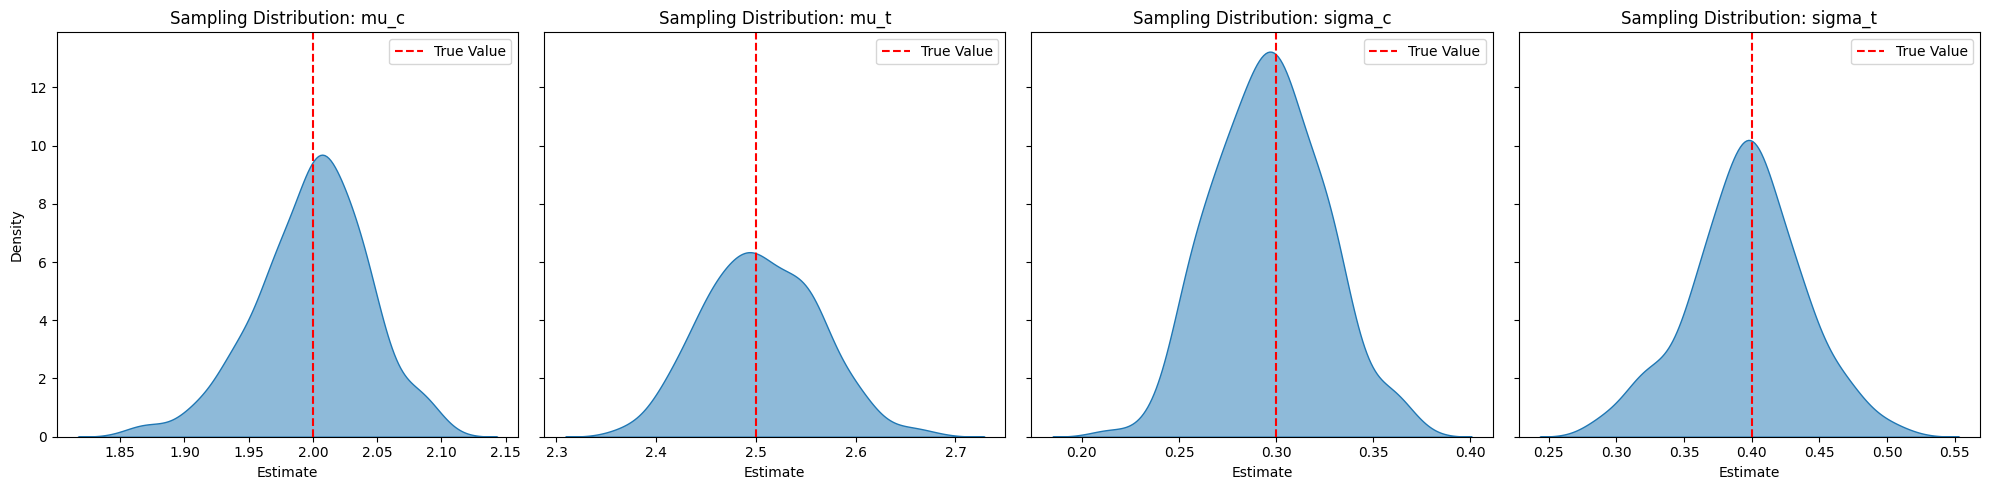

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.optimize import minimize, approx_fprime

# Set seed globally for reproducibility
np.random.seed(42)

# Generate synthetic data
def generate_data(N, mu_c, mu_t, sigma_c, sigma_t):
    T = np.random.binomial(1, 0.5, N)  # Random treatment assignment
    log_Y_0 = np.random.normal(mu_c, sigma_c, N)  # Log outcomes under control
    log_Y_1 = np.random.normal(mu_t, sigma_t, N)  # Log outcomes under treatment
    log_Y_obs = np.where(T == 1, log_Y_1, log_Y_0)  # Observed log outcomes
    Y_obs = np.exp(log_Y_obs)  # Transform to original scale
    return pd.DataFrame({'T': T, 'Y_obs': Y_obs})

# Negative log-likelihood function
def neg_log_likelihood(params, data):
    mu_c, mu_t, sigma_c, sigma_t = params
    T = data['T']
    Y_obs = data['Y_obs']
    log_Y_obs = np.log(Y_obs)

    # Log densities
    log_f_0 = -np.log(Y_obs * sigma_c) - ((log_Y_obs - mu_c)**2) / (2 * sigma_c**2)
    log_f_1 = -np.log(Y_obs * sigma_t) - ((log_Y_obs - mu_t)**2) / (2 * sigma_t**2)

    # Combine based on treatment
    log_likelihood = (1 - T) * log_f_0 + T * log_f_1
    return -np.sum(log_likelihood)

# Compute standard errors using Hessian approximation
def compute_standard_errors(result, data):
    params = result.x
    epsilon = 1e-6

    def gradient(p):
        return approx_fprime(p, neg_log_likelihood, epsilon, data)

    hessian = np.zeros((len(params), len(params)))
    for i in range(len(params)):
        p_up = params.copy()
        p_down = params.copy()
        p_up[i] += epsilon
        p_down[i] -= epsilon
        hessian[i] = (gradient(p_up) - gradient(p_down)) / (2 * epsilon)

    inv_hessian = np.linalg.inv(hessian)
    return np.sqrt(np.diag(inv_hessian))

# True parameters
mu_c_true = 2.0
mu_t_true = 2.5
sigma_c_true = 0.3
sigma_t_true = 0.4
print(mu_c_true, mu_t_true, sigma_c_true, sigma_t_true)

# Generate data
N = 1000
data = generate_data(N, mu_c_true, mu_t_true, sigma_c_true, sigma_t_true)

# Initial guesses
initial_params = [1.5, 2.0, 0.5, 0.5]

# Estimate parameters
result = minimize(
    neg_log_likelihood,
    initial_params,
    args=(data,),
    method='L-BFGS-B',
    bounds=[(None, None), (None, None), (1e-3, None), (1e-3, None)]
)

# Standard errors
standard_errors = compute_standard_errors(result, data)

# Results table
param_names = ['mu_c', 'mu_t', 'sigma_c', 'sigma_t']
estimates = result.x
t_values = estimates / standard_errors
p_values = 2 * (1 - np.abs(t_values))
conf_intervals = [
    (est - 1.96 * se, est + 1.96 * se)
    for est, se in zip(estimates, standard_errors)
]

results_table = pd.DataFrame({
    'Parameter': param_names,
    'Estimate': estimates,
    'StdErr': standard_errors,
    't-value': t_values,
    'p-value': p_values,
    '95% CI': conf_intervals
})
display(results_table)

# Monte Carlo simulation
M = 200
N_monte_carlo = 100
monte_carlo_results = {name: [] for name in param_names}

for _ in range(M):
    data_mc = generate_data(N_monte_carlo, mu_c_true, mu_t_true, sigma_c_true, sigma_t_true)
    result_mc = minimize(
        neg_log_likelihood,
        initial_params,
        args=(data_mc,),
        method='L-BFGS-B',
        bounds=[(None, None), (None, None), (1e-3, None), (1e-3, None)]
    )
    for i, name in enumerate(param_names):
        monte_carlo_results[name].append(result_mc.x[i])

# Plot distributions
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
true_values = [mu_c_true, mu_t_true, sigma_c_true, sigma_t_true]

for i, name in enumerate(param_names):
    sns.kdeplot(monte_carlo_results[name], ax=axes[i], fill=True, alpha=0.5)
    axes[i].axvline(true_values[i], color='red', linestyle='--', label='True Value')
    axes[i].set_title(f"Sampling Distribution: {name}")
    axes[i].set_xlabel('Estimate')
    axes[i].legend()

plt.tight_layout()
plt.show()


## Delta Method

- Goal: Estimate the standard error (SE) of a function $g(\hat{\theta})$ (e.g., ATE), where $\hat{\theta}$ are MLE parameter estimates.

- Delta Method:
  1. Let $g(\theta)$ be a smooth function of $\theta$.
  2. Compute $\nabla g(\hat{\theta})$ at the estimated $\hat{\theta}$.
  3. Use 
  $$
  \text{Var}(g(\hat{\theta})) \approx \nabla g(\hat{\theta})^\top \, \text{Cov}(\hat{\theta}) \, \nabla g(\hat{\theta}).
  $$
  4. The SE is the square root of this variance.

- Applying to ATE:
  - Suppose 
  $$
  \text{ATE}(\mu_c,\mu_t,\sigma_c,\sigma_t) 
  = \exp(\mu_t + 0.5\sigma_t^2) - \exp(\mu_c + 0.5\sigma_c^2).
  $$
  - Obtain $\hat{\theta}$ by MLE.
  - Invert Hessian to get $\text{Cov}(\hat{\theta})$.
  - Evaluate $\nabla \text{ATE}(\hat{\theta})$ and apply the formula above.

,Parameter,Estimate,StdErr,t-value,p-value,95% CI
0,mu_c,2.034862,0.012970,156.883970,0.0,"(2.0094396507705867, 2.0602839677732425)"
1,mu_t,2.520906,0.016884,149.307502,0.0,"(2.4878137888236576, 2.5539990308152603)"
2,sigma_c,0.290898,0.009172,31.717198,0.0,"(0.2729213686474354, 0.3088740737898243)"
3,sigma_t,0.376396,0.011938,31.527926,0.0,"(0.352996506127945, 0.3997954020239304)"
4,ATE,5.371162,0.256123,20.970999,0.0,"(4.869160189866652, 5.873163609382899)"


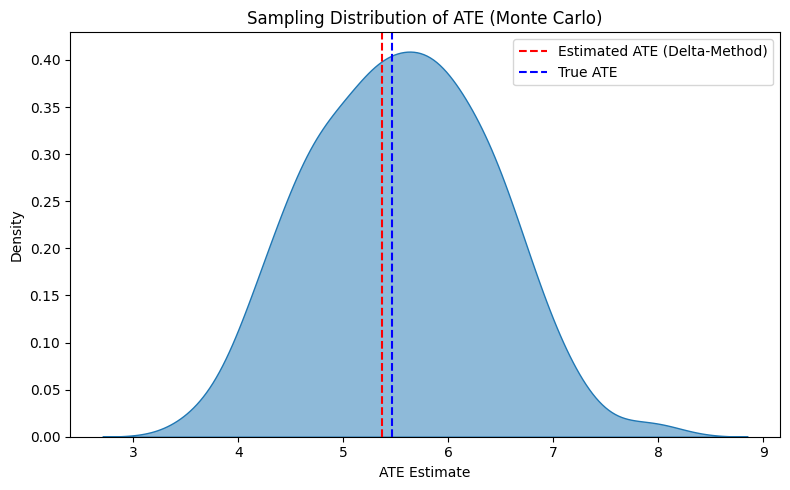

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.optimize import minimize, approx_fprime
from scipy import stats

# Set seed globally for reproducibility
np.random.seed(42)

# Generate synthetic data
def generate_data(N, mu_c, mu_t, sigma_c, sigma_t):
    T = np.random.binomial(1, 0.5, N)  # Random treatment assignment
    log_Y_0 = np.random.normal(mu_c, sigma_c, N)  # Log outcomes under control
    log_Y_1 = np.random.normal(mu_t, sigma_t, N)  # Log outcomes under treatment
    log_Y_obs = np.where(T == 1, log_Y_1, log_Y_0)  # Observed log outcomes
    Y_obs = np.exp(log_Y_obs)  # Transform to original scale
    return pd.DataFrame({'T': T, 'Y_obs': Y_obs})

# Negative log-likelihood function
def neg_log_likelihood(params, data):
    mu_c, mu_t, sigma_c, sigma_t = params
    T = data['T']
    Y_obs = data['Y_obs']
    log_Y_obs = np.log(Y_obs)

    # Log densities
    log_f_0 = -np.log(Y_obs * sigma_c) - ((log_Y_obs - mu_c)**2) / (2 * sigma_c**2)
    log_f_1 = -np.log(Y_obs * sigma_t) - ((log_Y_obs - mu_t)**2) / (2 * sigma_t**2)

    # Combine based on treatment
    log_likelihood = (1 - T) * log_f_0 + T * log_f_1
    return -np.sum(log_likelihood)

# Compute SEs and inverse Hessian
def compute_se_and_inv_hessian(result, data):
    params = result.x
    epsilon = 1e-6

    def gradient(p):
        return approx_fprime(p, neg_log_likelihood, epsilon, data)

    # Build Hessian via finite differences
    hessian = np.zeros((len(params), len(params)))
    for i in range(len(params)):
        p_up = params.copy()
        p_down = params.copy()
        p_up[i] += epsilon
        p_down[i] -= epsilon
        hessian[i] = (gradient(p_up) - gradient(p_down)) / (2 * epsilon)

    inv_hessian = np.linalg.inv(hessian)
    std_errs = np.sqrt(np.diag(inv_hessian))
    return std_errs, inv_hessian

# Delta-method for ATE
def compute_ate_and_gradient(mu_c, mu_t, sigma_c, sigma_t):
    # ATE
    ate = np.exp(mu_t + 0.5 * sigma_t**2) - np.exp(mu_c + 0.5 * sigma_c**2)
    # Gradient wrt (mu_c, mu_t, sigma_c, sigma_t)
    grad_mu_c = -np.exp(mu_c + 0.5 * sigma_c**2)
    grad_mu_t = np.exp(mu_t + 0.5 * sigma_t**2)
    grad_sigma_c = -sigma_c * np.exp(mu_c + 0.5 * sigma_c**2)
    grad_sigma_t = sigma_t * np.exp(mu_t + 0.5 * sigma_t**2)
    gradient = np.array([grad_mu_c, grad_mu_t, grad_sigma_c, grad_sigma_t])
    return ate, gradient

# True parameters
mu_c_true = 2.0
mu_t_true = 2.5
sigma_c_true = 0.3
sigma_t_true = 0.4

# True ATE
true_ate = np.exp(mu_t_true + 0.5 * sigma_t_true**2) - np.exp(mu_c_true + 0.5 * sigma_c_true**2)

# Generate data
N = 1000
data = generate_data(N, mu_c_true, mu_t_true, sigma_c_true, sigma_t_true)

# Initial guesses
initial_params = [1.5, 2.0, 0.5, 0.5]

# Optimize
result = minimize(
    neg_log_likelihood,
    initial_params,
    args=(data,),
    method='L-BFGS-B',
    bounds=[(None, None), (None, None), (1e-3, None), (1e-3, None)]
)

# Get standard errors and Hessian inverse
standard_errors, hessian_inv = compute_se_and_inv_hessian(result, data)

# Build results table
param_names = ['mu_c', 'mu_t', 'sigma_c', 'sigma_t']
estimates = result.x
t_values = estimates / standard_errors
p_values = 2 * (1 - stats.norm.cdf(np.abs(t_values)))
conf_intervals = [
    (est - 1.96 * se, est + 1.96 * se)
    for est, se in zip(estimates, standard_errors)
]
results_table = pd.DataFrame({
    'Parameter': param_names,
    'Estimate': estimates,
    'StdErr': standard_errors,
    't-value': t_values,
    'p-value': p_values,
    '95% CI': conf_intervals
})

# Delta-method ATE
mu_c, mu_t, sigma_c, sigma_t = estimates
ate, grad = compute_ate_and_gradient(mu_c, mu_t, sigma_c, sigma_t)
ate_variance = grad @ hessian_inv @ grad
ate_stderr = np.sqrt(ate_variance)
ate_ci = (ate - 1.96 * ate_stderr, ate + 1.96 * ate_stderr)

results_table.loc[len(results_table)] = [
    'ATE',
    ate,
    ate_stderr,
    ate / ate_stderr,
    2 * (1 - stats.norm.cdf(abs(ate / ate_stderr))),
    ate_ci
]

display(results_table)

# Monte Carlo
M = 200
N_monte_carlo = 100
ate_monte_carlo_results = []
for _ in range(M):
    data_mc = generate_data(
        N_monte_carlo, mu_c_true, mu_t_true, sigma_c_true, sigma_t_true
    )
    result_mc = minimize(
        neg_log_likelihood,
        initial_params,
        args=(data_mc,),
        method='L-BFGS-B',
        bounds=[(None, None), (None, None), (1e-3, None), (1e-3, None)]
    )
    mc_mu_c, mc_mu_t, mc_sigma_c, mc_sigma_t = result_mc.x
    mc_ate, _ = compute_ate_and_gradient(
        mc_mu_c, mc_mu_t, mc_sigma_c, mc_sigma_t
    )
    ate_monte_carlo_results.append(mc_ate)

plt.figure(figsize=(8, 5))
sns.kdeplot(ate_monte_carlo_results, fill=True, alpha=0.5)
plt.axvline(ate, color='red', linestyle='--', label='Estimated ATE (Delta-Method)')
plt.axvline(true_ate, color='blue', linestyle='--', label='True ATE')
plt.title('Sampling Distribution of ATE (Monte Carlo)')
plt.xlabel('ATE Estimate')
plt.legend()
plt.tight_layout()
plt.show()

## Heterogeneous Treatment Effects: Parametric Model

- Model Parameters:  
  - For potential outcomes:  
    - $\mu_c, \gamma_c$ for the control log-outcome model.  
    - $\mu_t, \gamma_t$ for the treatment log-outcome model.  
    - Error terms $\varepsilon_{i0}, \varepsilon_{i1} \sim \mathcal{N}(0,1)$.  
    - So,  
    $$
    \ln(Y_i(0)) = \mu_c + \gamma_c\,X_i + \varepsilon_{i0}, 
    \\
    \ln(Y_i(1)) = \mu_t + \gamma_t\,X_i + \varepsilon_{i1}.
    $$
  - For treatment assignment:  
    - $\alpha, \beta$ in the logistic function.  
    - Propensity $\pi_i = \frac{1}{1 + \exp(-(\alpha + \beta\,X_i))}$.  
    - Hence $T_i \sim \text{Bernoulli}(\pi_i)$.

- ATE Formula:  
  For $X \sim \mathcal{N}(0,1)$,  
  $\mathbb{E}[\exp(a + bX)] = \exp\!\bigl(a + \tfrac{b^2}{2}\bigr)$.  
  Thus,  
  $$
  \text{ATE} 
  = \exp\!\Bigl(\mu_t + 0.5 + \tfrac{\gamma_t^2}{2}\Bigr)
  \;-\;
  \exp\!\Bigl(\mu_c + 0.5 + \tfrac{\gamma_c^2}{2}\Bigr).
  $$

True ATE (Analytical): 5.097
Naive Estimated ATE (Confounded): 13.131


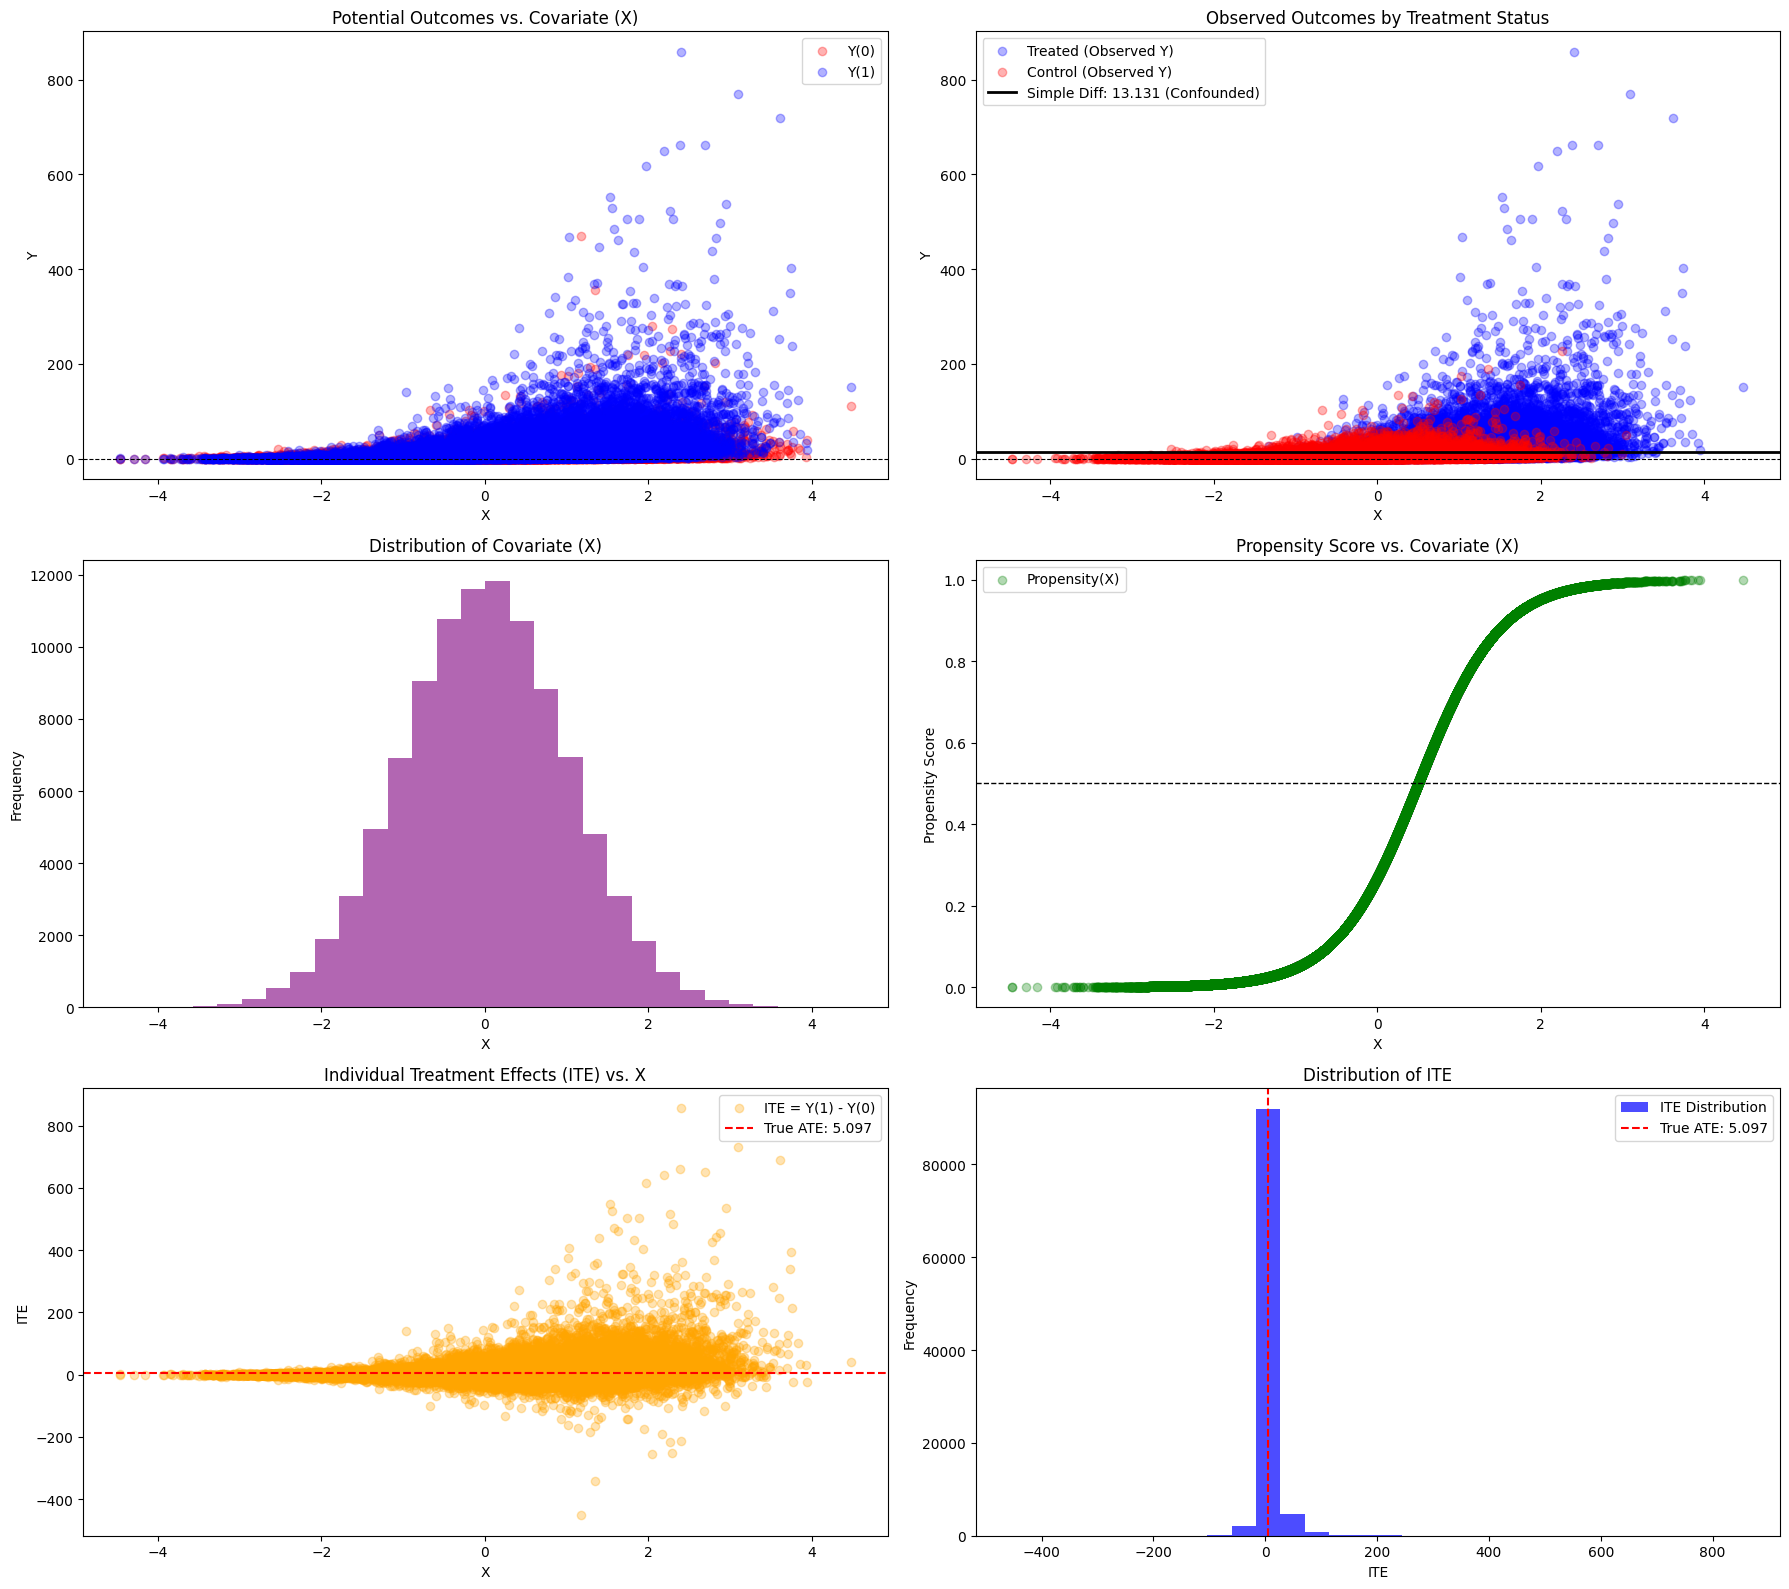

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# 1. Define parameters for potential outcomes
n = 100_000
mu_c = 1.0
gamma_c = 0.5
mu_t = 1.5
gamma_t = 0.8

# 2. Confounding parameters for propensity score
alpha = -1.0
beta = 2.0

# 3. Generate covariates
X = np.random.normal(0, 1, n)

# 4. Generate error terms (standard normal)
eps_0 = np.random.normal(0, 1, n)
eps_1 = np.random.normal(0, 1, n)

# 5. Potential outcomes in logs
lnY0 = mu_c + gamma_c * X + eps_0
lnY1 = mu_t + gamma_t * X + eps_1

# 6. Exponentiate to get Y(0) and Y(1)
Y0 = np.exp(lnY0)
Y1 = np.exp(lnY1)

# 7. Propensity score as a logistic function of X
propensity = 1 / (1 + np.exp(-(alpha + beta * X)))

# 8. Assign treatment with confounding
T = np.random.binomial(1, propensity)

# 9. Observed outcome
Y = np.where(T == 1, Y1, Y0)

# 10. Store in a DataFrame
data = pd.DataFrame({
    'X': X,
    'T': T,
    'lnY0': lnY0,
    'lnY1': lnY1,
    'Y0': Y0,
    'Y1': Y1,
    'Y': Y,
    'propensity': propensity
})

# 11. Individual Treatment Effect (ITE)
data['ITE'] = data['Y1'] - data['Y0']

# 12. True ATE (analytical)
# For each x, E[Y(0)|X=x] = exp(mu_c + gamma_c*x + 0.5)
#                 E[Y(1)|X=x] = exp(mu_t + gamma_t*x + 0.5)
# But X ~ N(0,1), so the ATE = E_X[exp(mu_t + gamma_t X + 0.5)] - E_X[exp(mu_c + gamma_c X + 0.5)]
# = exp(mu_t + 0.5 + gamma_t^2 / 2) - exp(mu_c + 0.5 + gamma_c^2 / 2)
true_ate = np.exp(mu_t + 0.5 + gamma_t**2 / 2) - np.exp(mu_c + 0.5 + gamma_c**2 / 2)

# 13. Naive Estimated ATE by simple difference in means (confounded)
estimated_ate = data.loc[data['T'] == 1, 'Y'].mean() - data.loc[data['T'] == 0, 'Y'].mean()

# 14. Plots
plt.figure(figsize=(18, 16))

# (a) Potential Outcomes vs X
plt.subplot(3, 2, 1)
plt.scatter(data['X'], data['Y0'], alpha=0.3, color='red', label='Y(0)')
plt.scatter(data['X'], data['Y1'], alpha=0.3, color='blue', label='Y(1)')
plt.title('Potential Outcomes vs. Covariate (X)')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()

# (b) Observed Outcomes by Treatment
plt.subplot(3, 2, 2)
treated = data[data['T'] == 1]
control = data[data['T'] == 0]
plt.scatter(treated['X'], treated['Y'], alpha=0.3, color='blue', label='Treated (Observed Y)')
plt.scatter(control['X'], control['Y'], alpha=0.3, color='red', label='Control (Observed Y)')
plt.axhline(estimated_ate, color='black', linestyle='-', linewidth=2,
            label=f'Simple Diff: {estimated_ate:.3f} (Confounded)')
plt.title('Observed Outcomes by Treatment Status')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()

# (c) Distribution of X
plt.subplot(3, 2, 3)
plt.hist(data['X'], bins=30, color='purple', alpha=0.6)
plt.title('Distribution of Covariate (X)')
plt.xlabel('X')
plt.ylabel('Frequency')

# (d) Propensity Score vs X
plt.subplot(3, 2, 4)
plt.scatter(data['X'], data['propensity'], alpha=0.3, color='green', label='Propensity(X)')
plt.title('Propensity Score vs. Covariate (X)')
plt.xlabel('X')
plt.ylabel('Propensity Score')
plt.axhline(0.5, color='black', linestyle='--', linewidth=1)
plt.legend()

# (e) ITE scatter
plt.subplot(3, 2, 5)
plt.scatter(data['X'], data['ITE'], alpha=0.3, color='orange', label='ITE = Y(1) - Y(0)')
plt.axhline(true_ate, color='red', linestyle='--', label=f'True ATE: {true_ate:.3f}')
plt.title('Individual Treatment Effects (ITE) vs. X')
plt.xlabel('X')
plt.ylabel('ITE')
plt.legend()

# (f) ITE histogram
plt.subplot(3, 2, 6)
plt.hist(data['ITE'], bins=30, alpha=0.7, color='blue', label='ITE Distribution')
plt.axvline(true_ate, color='red', linestyle='--', label=f'True ATE: {true_ate:.3f}')
plt.title('Distribution of ITE')
plt.xlabel('ITE')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()

# Print key results
print(f'True ATE (Analytical): {true_ate:.3f}')
print(f'Naive Estimated ATE (Confounded): {estimated_ate:.3f}')

plt.show()


## MLE Estimation
- Data consists of $\{x_i, T_i, y_i\}_{i=1}^N$.  
- Treatment assignment:  
  $$
  p_i = \frac{1}{1+\exp\bigl[-(\alpha + \beta x_i)\bigr]}, 
  \quad
  T_i \sim \text{Bernoulli}(p_i).
  $$
  Contribution to log-likelihood:  
  $$
  T_i \ln p_i + (1-T_i)\ln(1-p_i).
  $$

- Outcome model:  
  - If $T_i=0$, then $\ln(y_i)\sim \mathcal{N}(\mu_c + \gamma_c x_i, 1)$.  
  - If $T_i=1$, then $\ln(y_i)\sim \mathcal{N}(\mu_t + \gamma_t x_i, 1)$.  
  Hence for $y_i>0$:  
  $$
  f_0(y_i\mid x_i) 
  = \frac{1}{y_i\sqrt{2\pi}}
    \exp\Bigl[-\tfrac{\bigl(\ln(y_i)-[\mu_c+\gamma_c x_i]\bigr)^2}{2}\Bigr],
  $$
  $$
  f_1(y_i\mid x_i) 
  = \frac{1}{y_i\sqrt{2\pi}}
    \exp\Bigl[-\tfrac{\bigl(\ln(y_i)-[\mu_t+\gamma_t x_i]\bigr)^2}{2}\Bigr].
  $$

- Combined per-observation likelihood:  
  $$
  p_i^{\,T_i}\,(1-p_i)^{\,1-T_i}
  \times
  f_0(y_i\mid x_i)^{\,1-T_i}\,f_1(y_i\mid x_i)^{\,T_i}.
  $$

- Log-likelihood:  
  $$
  \ell(\alpha,\beta,\mu_c,\gamma_c,\mu_t,\gamma_t) 
  = \sum_{i=1}^N
    \Bigl[
      T_i \ln p_i + (1-T_i)\ln(1-p_i)
      + (1-T_i)\ln f_0(y_i\mid x_i)
      + T_i\ln f_1(y_i\mid x_i)
    \Bigr].
  $$

[-1.0, 2.0, 1.0, 0.5, 1.5, 0.8]


,Parameter,Estimate,StdErr,t-value,p-value,95% CI
0,alpha,-0.991113,0.066772,-14.843306,-27.686613,"(-1.1219852290483407, -0.860240190859001)"
1,beta,2.134281,0.098731,21.617039,-41.234078,"(1.94076757208643, 2.3277947795961147)"
2,mu_c,0.966971,0.031720,30.484925,-58.969851,"(0.9048009373965933, 1.0291420047127064)"
3,gamma_c,0.496646,0.035371,14.040942,-26.081884,"(0.42731842781367135, 0.5659738579580891)"
4,mu_t,1.384453,0.053874,25.697788,-49.395576,"(1.2788588140866266, 1.4900464163930023)"
5,gamma_t,0.812507,0.047702,17.032907,-32.065813,"(0.7190102976786577, 0.9060027902406531)"


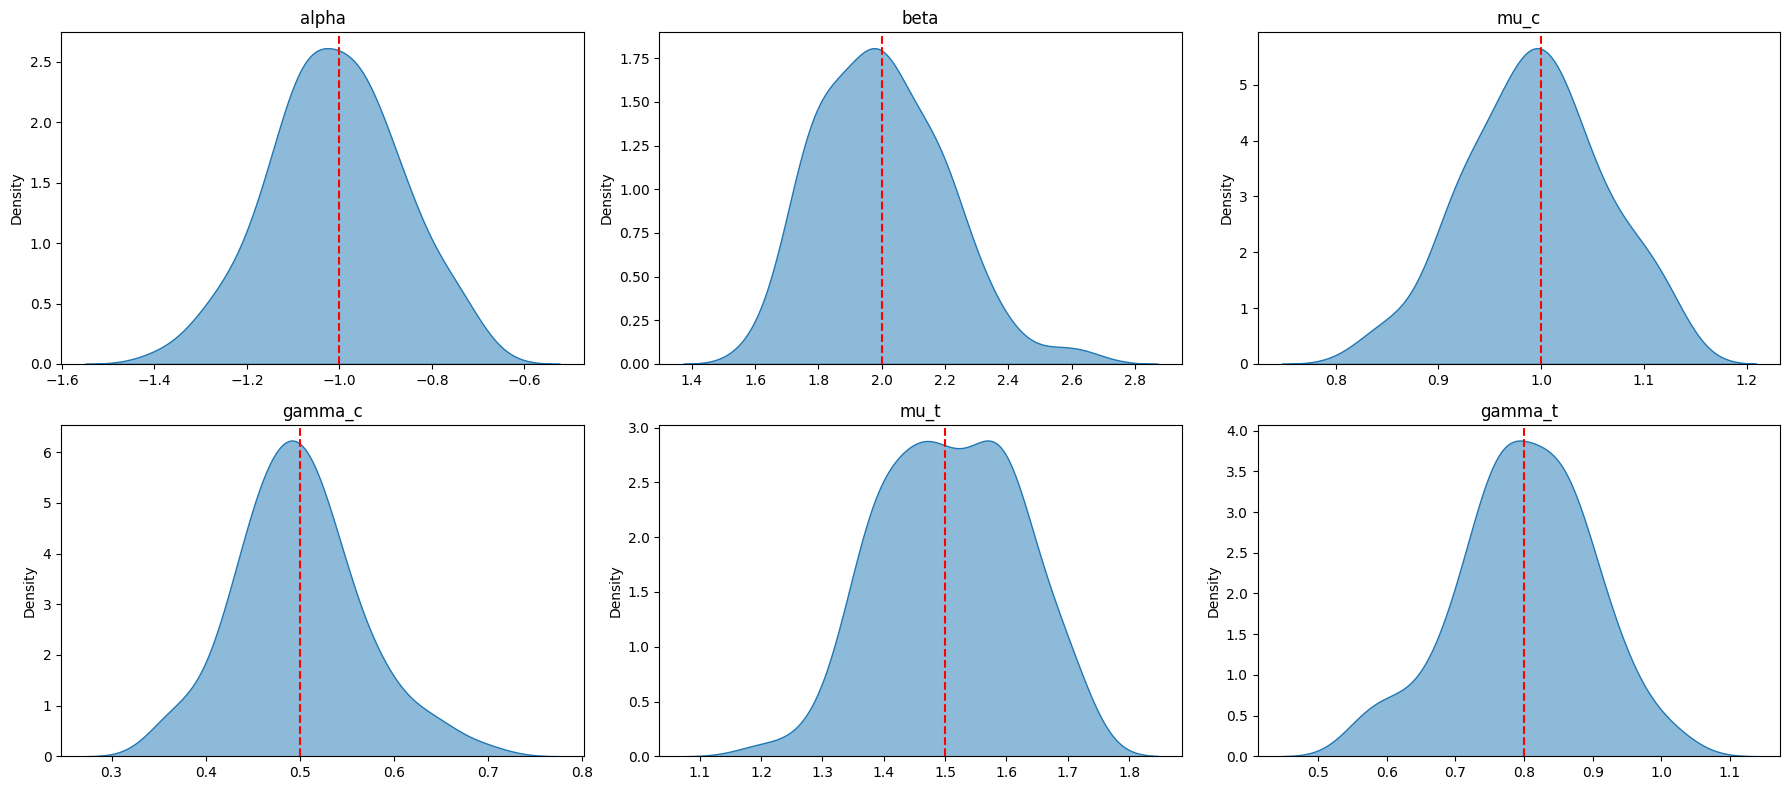

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.optimize import minimize, approx_fprime

np.random.seed(42)

def generate_data(N, alpha, beta, mu_c, gamma_c, mu_t, gamma_t):
    X = np.random.normal(0, 1, N)
    logit = alpha + beta * X
    p = 1 / (1 + np.exp(-logit))
    T = np.random.binomial(1, p, N)
    eps_0 = np.random.normal(0, 1, N)
    eps_1 = np.random.normal(0, 1, N)
    lnY0 = mu_c + gamma_c * X + eps_0
    lnY1 = mu_t + gamma_t * X + eps_1
    Y0 = np.exp(lnY0)
    Y1 = np.exp(lnY1)
    Y_obs = np.where(T == 1, Y1, Y0)
    return pd.DataFrame({'X': X, 'T': T, 'Y_obs': Y_obs, 'p': p})

def neg_log_likelihood(params, data):
    alpha, beta, mu_c, gamma_c, mu_t, gamma_t = params
    X = data['X'].values
    T = data['T'].values
    Y_obs = data['Y_obs'].values
    eps = 1e-12
    logit = alpha + beta * X
    p = 1 / (1 + np.exp(-logit))
    log_lik_T = T * np.log(p + eps) + (1 - T) * np.log(1 - p + eps)
    lnY_obs = np.log(Y_obs + eps)
    mean_c = mu_c + gamma_c * X
    mean_t = mu_t + gamma_t * X
    log_f0 = -0.5 * (lnY_obs - mean_c)**2 - np.log(Y_obs + eps) - 0.5*np.log(2*np.pi)
    log_f1 = -0.5 * (lnY_obs - mean_t)**2 - np.log(Y_obs + eps) - 0.5*np.log(2*np.pi)
    log_lik_Y = (1 - T) * log_f0 + T * log_f1
    return -np.sum(log_lik_T + log_lik_Y)

def compute_standard_errors(result, data):
    params = result.x
    k = len(params)
    epsilon = 1e-6
    def gradient(p):
        return approx_fprime(p, neg_log_likelihood, epsilon, data)
    hessian = np.zeros((k, k))
    for i in range(k):
        p_up = params.copy()
        p_down = params.copy()
        p_up[i] += epsilon
        p_down[i] -= epsilon
        hessian[i] = (gradient(p_up) - gradient(p_down)) / (2 * epsilon)
    inv_hessian = np.linalg.inv(hessian)
    return np.sqrt(np.diag(inv_hessian))

alpha_true = -1.0
beta_true = 2.0
mu_c_true = 1.0
gamma_c_true = 0.5
mu_t_true = 1.5
gamma_t_true = 0.8
true_params = [alpha_true, beta_true, mu_c_true, gamma_c_true, mu_t_true, gamma_t_true]
print(true_params)

N = 2000
data = generate_data(N, *true_params)
initial_params = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
result = minimize(neg_log_likelihood, initial_params, args=(data,), method='L-BFGS-B')
se = compute_standard_errors(result, data)

param_names = ['alpha','beta','mu_c','gamma_c','mu_t','gamma_t']
est = result.x
t_vals = est / se
p_vals = 2 * (1 - np.abs(t_vals))
cis = [(e - 1.96*s, e + 1.96*s) for e, s in zip(est, se)]

results = pd.DataFrame({
    'Parameter': param_names,
    'Estimate': est,
    'StdErr': se,
    't-value': t_vals,
    'p-value': p_vals,
    '95% CI': cis
})
display(results)

M = 100
N_mc = 500
mc_out = {name: [] for name in param_names}
for _ in range(M):
    d_mc = generate_data(N_mc, *true_params)
    r_mc = minimize(neg_log_likelihood, initial_params, args=(d_mc,), method='L-BFGS-B')
    for i, nm in enumerate(param_names):
        mc_out[nm].append(r_mc.x[i])

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()
for i, nm in enumerate(param_names):
    sns.kdeplot(mc_out[nm], ax=axes[i], fill=True, alpha=0.5)
    axes[i].axvline(true_params[i], color='red', linestyle='--')
    axes[i].set_title(nm)
plt.tight_layout()
plt.show()


,Parameter,Estimate,StdErr,t-value,p-value,95% CI
0,alpha,-0.991113,0.066772,-14.843306,0.0,"(-1.1219852290483407, -0.860240190859001)"
1,beta,2.134281,0.098731,21.617039,0.0,"(1.94076757208643, 2.3277947795961147)"
2,mu_c,0.966971,0.031720,30.484925,0.0,"(0.9048009373965933, 1.0291420047127064)"
3,gamma_c,0.496646,0.035371,14.040942,0.0,"(0.42731842781367135, 0.5659738579580891)"
4,mu_t,1.384453,0.053874,25.697788,0.0,"(1.2788588140866266, 1.4900464163930023)"
5,gamma_t,0.812507,0.047702,17.032907,0.0,"(0.7190102976786577, 0.9060027902406531)"
6,ATE,4.251939,0.396709,10.718028,0.0,"(3.474388914261713, 5.0294883589496)"


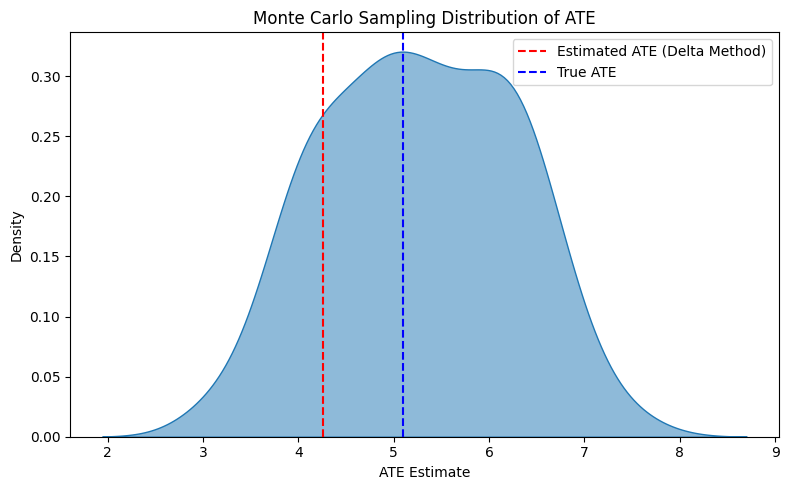

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.optimize import minimize, approx_fprime
from scipy import stats

np.random.seed(42)

###############################################################################
# Data Generation
###############################################################################
def generate_data(N, alpha, beta, mu_c, gamma_c, mu_t, gamma_t):
    X = np.random.normal(0, 1, N)
    logit = alpha + beta * X
    p = 1 / (1 + np.exp(-logit))
    T = np.random.binomial(1, p, N)
    eps_0 = np.random.normal(0, 1, N)
    eps_1 = np.random.normal(0, 1, N)
    lnY0 = mu_c + gamma_c * X + eps_0
    lnY1 = mu_t + gamma_t * X + eps_1
    Y0 = np.exp(lnY0)
    Y1 = np.exp(lnY1)
    Y_obs = np.where(T == 1, Y1, Y0)
    return pd.DataFrame({'X': X, 'T': T, 'Y_obs': Y_obs, 'p': p})

###############################################################################
# Negative Log-Likelihood
###############################################################################
def neg_log_likelihood(params, data):
    alpha, beta, mu_c, gamma_c, mu_t, gamma_t = params
    X = data['X'].values
    T = data['T'].values
    Y_obs = data['Y_obs'].values
    eps = 1e-12

    # Propensity score
    logit = alpha + beta * X
    p = 1 / (1 + np.exp(-logit))
    log_lik_T = T * np.log(p + eps) + (1 - T) * np.log(1 - p + eps)

    # Outcome model (log-normal with unit variance)
    lnY_obs = np.log(Y_obs + eps)
    mean_c = mu_c + gamma_c * X
    mean_t = mu_t + gamma_t * X
    log_f0 = -0.5 * (lnY_obs - mean_c) ** 2 - np.log(Y_obs + eps) - 0.5 * np.log(2 * np.pi)
    log_f1 = -0.5 * (lnY_obs - mean_t) ** 2 - np.log(Y_obs + eps) - 0.5 * np.log(2 * np.pi)
    log_lik_Y = (1 - T) * log_f0 + T * log_f1

    return -np.sum(log_lik_T + log_lik_Y)

###############################################################################
# Hessian-Based SE (Finite Differences)
###############################################################################
def compute_hessian_and_se(result, data):
    params = result.x
    k = len(params)
    e = 1e-6

    def gradient(p):
        return approx_fprime(p, neg_log_likelihood, e, data)

    hessian = np.zeros((k, k))
    for i in range(k):
        p_up = params.copy()
        p_down = params.copy()
        p_up[i] += e
        p_down[i] -= e
        grad_up = gradient(p_up)
        grad_down = gradient(p_down)
        hessian[i] = (grad_up - grad_down) / (2 * e)

    inv_hessian = np.linalg.inv(hessian)
    se = np.sqrt(np.diag(inv_hessian))
    return hessian, inv_hessian, se

###############################################################################
# ATE and Delta Method
###############################################################################
def compute_ate_and_gradient(params):
    # params = [alpha, beta, mu_c, gamma_c, mu_t, gamma_t]
    # ATE depends only on mu_c, gamma_c, mu_t, gamma_t
    _, _, mu_c, gamma_c, mu_t, gamma_t = params
    # Using X~N(0,1): E[exp(a + bX)] = exp(a + b^2/2)
    ate = np.exp(mu_t + 0.5 + gamma_t**2 / 2.) - np.exp(mu_c + 0.5 + gamma_c**2 / 2.)

    # Gradient wrt [alpha, beta, mu_c, gamma_c, mu_t, gamma_t]
    # partial derivatives wrt alpha, beta = 0
    # partial wrt mu_c: -exp(mu_c + 0.5 + gamma_c^2/2)
    # partial wrt gamma_c: -gamma_c * exp(mu_c + 0.5 + gamma_c^2/2)
    # partial wrt mu_t: exp(mu_t + 0.5 + gamma_t^2/2)
    # partial wrt gamma_t: gamma_t * exp(mu_t + 0.5 + gamma_t^2/2)
    g_mu_c = -np.exp(mu_c + 0.5 + gamma_c**2 / 2.)
    g_gamma_c = -gamma_c * np.exp(mu_c + 0.5 + gamma_c**2 / 2.)
    g_mu_t = np.exp(mu_t + 0.5 + gamma_t**2 / 2.)
    g_gamma_t = gamma_t * np.exp(mu_t + 0.5 + gamma_t**2 / 2.)

    gradient = np.array([0., 0., g_mu_c, g_gamma_c, g_mu_t, g_gamma_t])
    return ate, gradient

###############################################################################
# Main
###############################################################################
alpha_true = -1.0
beta_true = 2.0
mu_c_true = 1.0
gamma_c_true = 0.5
mu_t_true = 1.5
gamma_t_true = 0.8
true_params = [alpha_true, beta_true, mu_c_true, gamma_c_true, mu_t_true, gamma_t_true]

N = 2000
data = generate_data(N, *true_params)
init = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
result = minimize(neg_log_likelihood, init, args=(data,), method='L-BFGS-B')
hessian, inv_hessian, se = compute_hessian_and_se(result, data)

param_names = ['alpha','beta','mu_c','gamma_c','mu_t','gamma_t']
est = result.x
t_vals = est / se
p_vals = 2 * (1 - stats.norm.cdf(np.abs(t_vals)))
cis = [(e - 1.96*s, e + 1.96*s) for e, s in zip(est, se)]

results_df = pd.DataFrame({
    'Parameter': param_names,
    'Estimate': est,
    'StdErr': se,
    't-value': t_vals,
    'p-value': p_vals,
    '95% CI': cis
})

# Delta Method for ATE
ate, grad = compute_ate_and_gradient(est)
var_ate = grad @ inv_hessian @ grad
se_ate = np.sqrt(var_ate)
ci_ate = (ate - 1.96*se_ate, ate + 1.96*se_ate)
results_df.loc[len(results_df)] = [
    'ATE',
    ate,
    se_ate,
    ate / se_ate,
    2 * (1 - stats.norm.cdf(abs(ate / se_ate))),
    ci_ate
]

display(results_df)

###############################################################################
# Monte Carlo Simulation
###############################################################################
M = 100
N_mc = 500
mc_ate = []

for _ in range(M):
    d_mc = generate_data(N_mc, *true_params)
    r_mc = minimize(neg_log_likelihood, init, args=(d_mc,), method='L-BFGS-B')
    ate_hat, _ = compute_ate_and_gradient(r_mc.x)
    mc_ate.append(ate_hat)

ate_true = np.exp(mu_t_true + 0.5 + gamma_t_true**2 / 2.) \
           - np.exp(mu_c_true + 0.5 + gamma_c_true**2 / 2.)

plt.figure(figsize=(8,5))
sns.kdeplot(mc_ate, fill=True, alpha=0.5)
plt.axvline(ate, color='r', linestyle='--', label='Estimated ATE (Delta Method)')
plt.axvline(ate_true, color='b', linestyle='--', label='True ATE')
plt.title('Monte Carlo Sampling Distribution of ATE')
plt.xlabel('ATE Estimate')
plt.legend()
plt.tight_layout()
plt.show()


## Profit Optimization

- We set parameters $\alpha, \beta, \mu_c, \gamma_c, \mu_t, \gamma_t$ and generated synthetic data.  
- We computed net gains $\widehat{\text{CATE}}(x_i) - c(x_i)$ for each individual.  
- We solved a 0-1 knapsack under a budget constraint using OR-Tools:  
  $$
  \max \sum_{i} [\widehat{\text{CATE}}(x_i) - c(x_i)] \cdot T_i
  \quad
  \text{subject to}
  \quad
  \sum_{i} c(x_i)\,T_i \le B.
  $$
- We compared the optimized allocation against a random selection and visualized the outcomes in a 2x2 plot grid.

MLE Results:


,Param,Estimate,StdErr,t-value,p-value,95% CI
0,alpha,-0.991113,0.066772,-14.843306,0.0,"(-1.1219852290464591, -0.8602401908608828)"
1,beta,2.134281,0.098731,21.617039,0.0,"(1.9407675720999544, 2.3277947795825904)"
2,mu_c,0.966971,0.031720,30.484925,0.0,"(0.9048009373974872, 1.0291420047118125)"
3,gamma_c,0.496646,0.035371,14.040942,0.0,"(0.4273184278127439, 0.5659738579590166)"
4,mu_t,1.384453,0.053874,25.697788,0.0,"(1.2788588140822832, 1.4900464163973457)"
5,gamma_t,0.812507,0.047702,17.032907,0.0,"(0.7190102976800019, 0.9060027902393089)"


[OR-Tools] Knapsack solver value = 8422
Realized profit (OR-Tools)     = 10454.96
Random profit                  = 2390.75


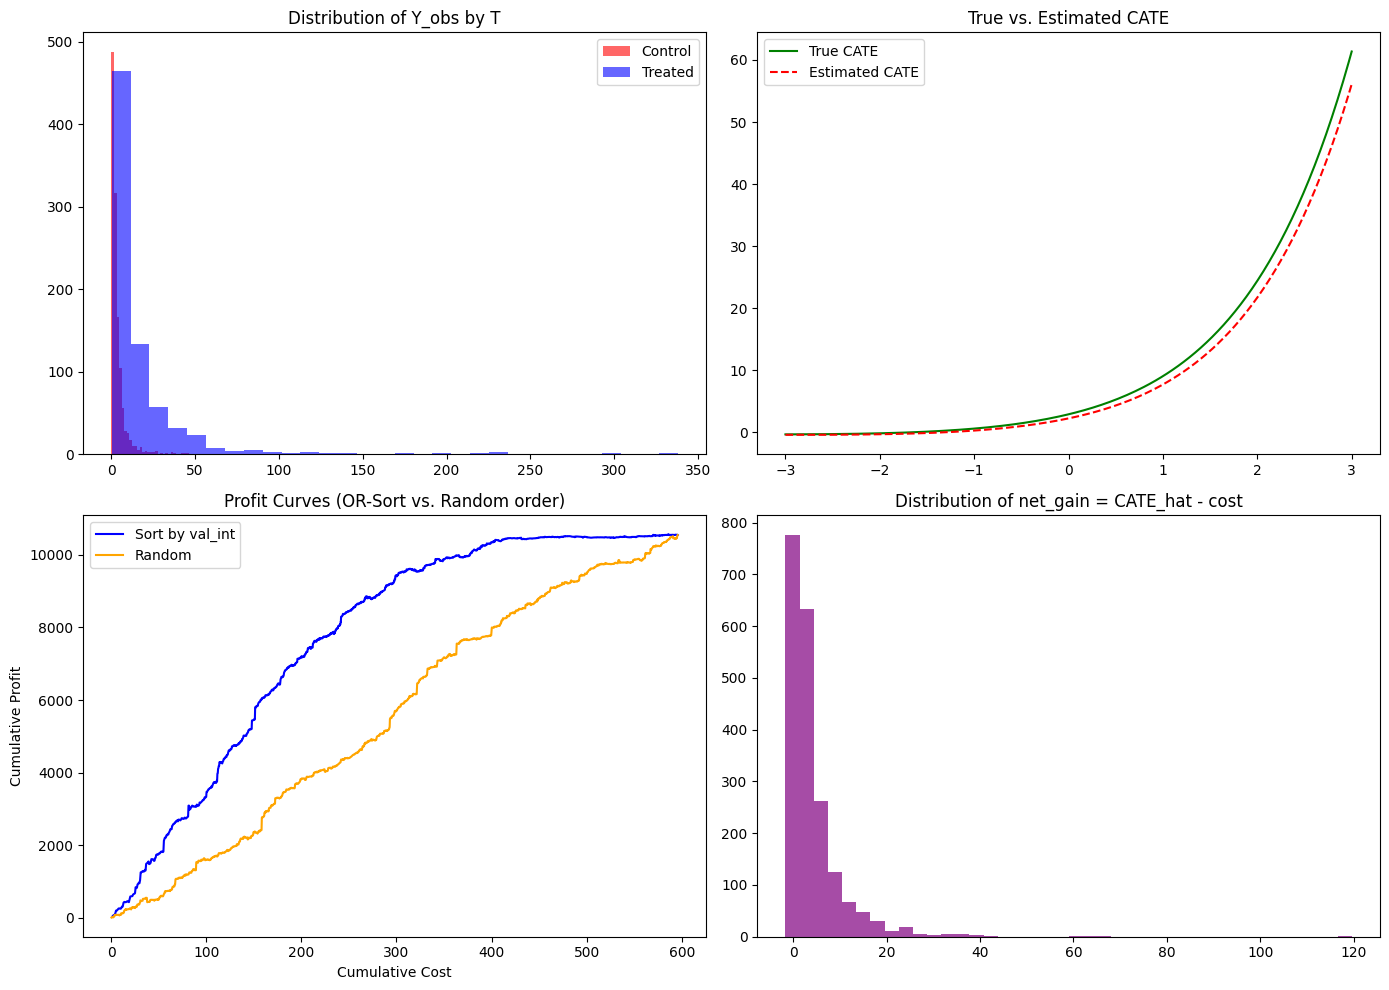

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.optimize import minimize
from scipy.stats import norm

# OR-Tools (install via: pip install ortools)
from ortools.algorithms.python import knapsack_solver

np.random.seed(42)

###############################################################################
# 1. Data Generation
###############################################################################
def generate_data(N, alpha, beta, mu_c, gamma_c, mu_t, gamma_t):
    X = np.random.normal(0, 1, N)
    logit = alpha + beta * X
    p = 1 / (1 + np.exp(-logit))
    T = np.random.binomial(1, p, N)

    eps0 = np.random.normal(0, 1, N)
    eps1 = np.random.normal(0, 1, N)

    lnY0 = mu_c + gamma_c * X + eps0
    lnY1 = mu_t + gamma_t * X + eps1
    Y0 = np.exp(lnY0)
    Y1 = np.exp(lnY1)
    Y_obs = np.where(T == 1, Y1, Y0)

    cost = 0.2 + 0.1 * (X**2)  # Example cost function

    df = pd.DataFrame({
        'X': X,
        'T': T,
        'Y0': Y0,
        'Y1': Y1,
        'Y_obs': Y_obs,
        'cost': cost
    })
    return df

###############################################################################
# 2. Negative Log-Likelihood
###############################################################################
def neg_log_likelihood(params, data):
    alpha, beta, mu_c, gamma_c, mu_t, gamma_t = params
    X = data['X'].values
    T = data['T'].values
    Y_obs = data['Y_obs'].values

    eps = 1e-12
    logit = alpha + beta * X
    p = 1 / (1 + np.exp(-logit))

    ll_T = T * np.log(p + eps) + (1 - T) * np.log(1 - p + eps)

    lnY = np.log(Y_obs + eps)
    mean_c = mu_c + gamma_c * X
    mean_t = mu_t + gamma_t * X

    log_f0 = -0.5*(lnY - mean_c)**2 - np.log(Y_obs+eps) - 0.5*np.log(2*np.pi)
    log_f1 = -0.5*(lnY - mean_t)**2 - np.log(Y_obs+eps) - 0.5*np.log(2*np.pi)

    ll_Y = (1 - T)*log_f0 + T*log_f1
    return -np.sum(ll_T + ll_Y)

###############################################################################
# 3. Hessian for SE
###############################################################################
def approximate_hessian(params, data, h=1e-6):
    k = len(params)
    hessian = np.zeros((k, k))

    def gradient(p):
        base = neg_log_likelihood(p, data)
        g = np.zeros(k)
        for i in range(k):
            p_up = p.copy()
            p_up[i] += h
            g[i] = (neg_log_likelihood(p_up, data) - base) / h
        return g

    for i in range(k):
        p_down = params.copy()
        p_up = params.copy()
        p_down[i] -= h
        p_up[i] += h
        g_down = gradient(p_down)
        g_up = gradient(p_up)
        hessian[i,:] = (g_up - g_down)/(2*h)
    return hessian

###############################################################################
# 4. CATE, net gain
###############################################################################
def cate_function(x, mu_c, gc, mu_t, gt):
    """
    CATE(x) = E[Y(1)|X=x] - E[Y(0)|X=x]
            = exp(mu_t + gt*x + 0.5) - exp(mu_c + gc*x + 0.5)
    """
    return np.exp(mu_t + gt*x + 0.5) - np.exp(mu_c + gc*x + 0.5)

###############################################################################
# 5. OR-Tools Knapsack
###############################################################################
def or_tools_knapsack(values, costs, capacity):
    """
    Solve 0-1 Knapsack using OR-Tools
    values[i], costs[i] must be integers >= 0
    """
    solver = knapsack_solver.KnapsackSolver(
        knapsack_solver.SolverType.KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER,
        'KnapsackExample'
    )
    solver.init(values, [costs], [capacity])
    best_val = solver.solve()
    chosen = []
    for i in range(len(values)):
        chosen.append(int(solver.best_solution_contains(i)))
    return chosen, best_val

###############################################################################
# 6. Main
###############################################################################
if __name__ == "__main__":
    # True parameters
    alpha_true, beta_true = -1.0, 2.0
    mu_c_true, gamma_c_true = 1.0, 0.5
    mu_t_true, gamma_t_true = 1.5, 0.8

    # Generate data
    N = 2000
    df = generate_data(N, alpha_true, beta_true, mu_c_true, gamma_c_true, mu_t_true, gamma_t_true)

    # MLE
    init = np.zeros(6)
    res = minimize(neg_log_likelihood, init, args=(df,), method='L-BFGS-B')
    est_params = res.x

    # Hessian -> SE
    H = approximate_hessian(est_params, df)
    invH = np.linalg.inv(H)
    se = np.sqrt(np.diag(invH))

    # Summaries
    names = ['alpha','beta','mu_c','gamma_c','mu_t','gamma_t']
    t_vals = est_params / se
    p_vals = 2*(1 - norm.cdf(np.abs(t_vals)))
    cis = [(e - 1.96*s, e + 1.96*s) for e,s in zip(est_params, se)]

    results_df = pd.DataFrame({
        'Param': names,
        'Estimate': est_params,
        'StdErr': se,
        't-value': t_vals,
        'p-value': p_vals,
        '95% CI': cis
    })
    print("MLE Results:")
    display(results_df)

    # CATE
    df['CATE_hat'] = cate_function(df['X'], est_params[2], est_params[3], est_params[4], est_params[5])
    df['net_gain'] = df['CATE_hat'] - df['cost']

    # Convert costs, net_gain to integers for OR-Tools
    df['cost_int'] = np.round(df['cost']).clip(lower=0).astype(int)
    df['val_int'] = np.round(df['net_gain']).clip(lower=0).astype(int)

    # Solve knapsack
    budget = 150
    chosen, best_val = or_tools_knapsack(df['val_int'].tolist(), df['cost_int'].tolist(), budget)
    df['Ad_or_tools'] = chosen
    df['profit'] = np.where(df['Ad_or_tools']==1, (df['Y1'] - df['Y0']) - df['cost'], 0.)
    total_profit_or = df['profit'].sum()

    # Random approach
    df_rand = df.sample(frac=1.0).reset_index(drop=True)
    used = 0.0
    picks_rand = []
    for _, row in df_rand.iterrows():
        if used + row['cost'] <= budget:
            picks_rand.append(1)
            used += row['cost']
        else:
            picks_rand.append(0)
    df_rand['Ad_rand'] = picks_rand
    df_rand['profit_rand'] = np.where(df_rand['Ad_rand']==1, (df_rand['Y1'] - df_rand['Y0']) - df_rand['cost'], 0.)
    total_profit_rand = df_rand['profit_rand'].sum()

    print(f"[OR-Tools] Knapsack solver value = {best_val}")
    print(f"Realized profit (OR-Tools)     = {total_profit_or:.2f}")
    print(f"Random profit                  = {total_profit_rand:.2f}")

    # Create subplots (2x2 grid)
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # (a) Distribution of Y_obs by T
    axes[0,0].hist(df.loc[df['T']==0, 'Y_obs'], bins=30, alpha=0.6, color='red', label='Control')
    axes[0,0].hist(df.loc[df['T']==1, 'Y_obs'], bins=30, alpha=0.6, color='blue', label='Treated')
    axes[0,0].set_title("Distribution of Y_obs by T")
    axes[0,0].legend()

    # (b) True vs. Estimated CATE
    xs = np.linspace(-3, 3, 200)
    true_cate = np.exp(mu_t_true + gamma_t_true*xs + 0.5) - np.exp(mu_c_true + gamma_c_true*xs + 0.5)
    est_cate = np.exp(est_params[4] + est_params[5]*xs + 0.5) - np.exp(est_params[2] + est_params[3]*xs + 0.5)
    axes[0,1].plot(xs, true_cate, label='True CATE', color='green')
    axes[0,1].plot(xs, est_cate, label='Estimated CATE', color='red', linestyle='--')
    axes[0,1].set_title("True vs. Estimated CATE")
    axes[0,1].legend()

    # (c) Profit curves: OR-Tools vs random
    df_or = df.sort_values('val_int', ascending=False).reset_index(drop=True)
    cum_cost_or = df_or['cost'].cumsum()
    cum_profit_or = ((df_or['Y1'] - df_or['Y0']) - df_or['cost']).cumsum()

    df_rand2 = df.copy()
    df_rand2['rnd'] = np.random.uniform(size=len(df_rand2))
    df_rand2.sort_values('rnd', inplace=True)
    cum_cost_rand = df_rand2['cost'].cumsum()
    cum_profit_rand = ((df_rand2['Y1'] - df_rand2['Y0']) - df_rand2['cost']).cumsum()

    axes[1,0].plot(cum_cost_or, cum_profit_or, label='Sort by val_int', color='blue')
    axes[1,0].plot(cum_cost_rand, cum_profit_rand, label='Random', color='orange')
    axes[1,0].set_xlabel("Cumulative Cost")
    axes[1,0].set_ylabel("Cumulative Profit")
    axes[1,0].set_title("Profit Curves (OR-Sort vs. Random order)")
    axes[1,0].legend()

    # (d) Distribution of net_gain
    axes[1,1].hist(df['net_gain'], bins=40, alpha=0.7, color='purple')
    axes[1,1].set_title("Distribution of net_gain = CATE_hat - cost")

    plt.tight_layout()
    plt.show()
